In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서울

In [2]:
city = '서울'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24


## 결측치 확인

In [3]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

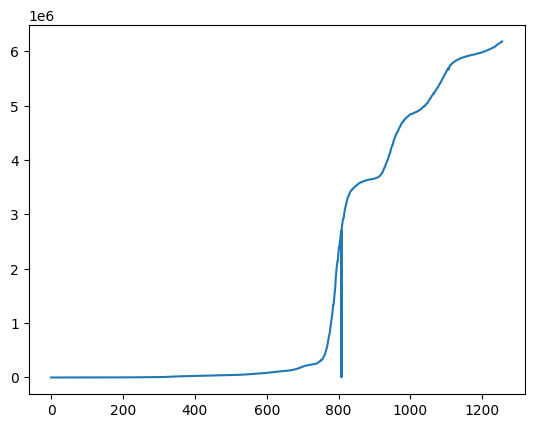

In [4]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [5]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
351,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,0,65033,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [16]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


In [7]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [8]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
351,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,0,65033,22590.00,2022-03-22


## 데이터 수정

In [9]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [22]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 12
#n = int(input())
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1164,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1165,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1166,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1167,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1168,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1169,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1170,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1171,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22
1172,6371,5970352,서울,Seoul,2467,0,0,2466,1,63323.0,2023-03-23
1173,6372,5972545,서울,Seoul,2193,0,0,2191,2,63347.0,2023-03-24


In [23]:
del_index = [350, 654, 751, 752, 785, 797, 801, 808, 835, 1024, 1050, 1091, 1154, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


In [24]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [25]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 확인

In [26]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


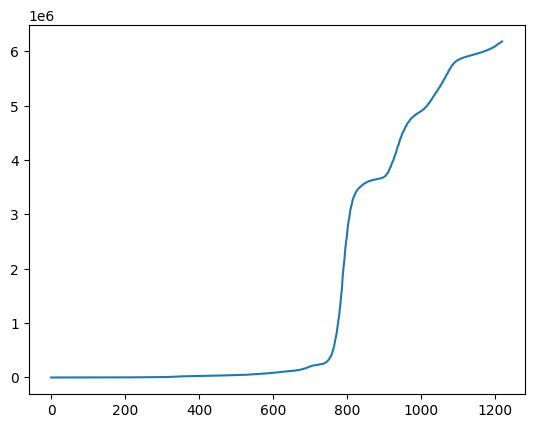

In [28]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [31]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 부산

In [89]:
city = '부산'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-20
1,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-21
2,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-22
3,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-23
4,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [90]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

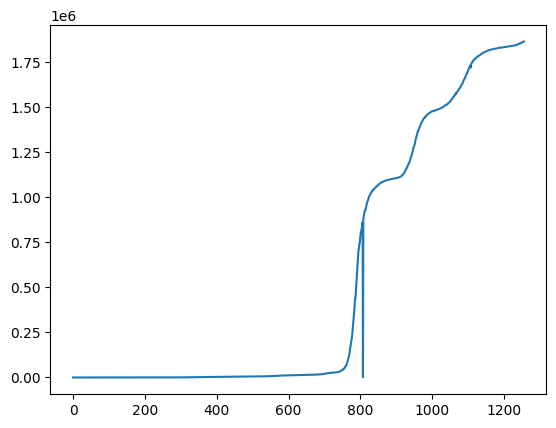

In [91]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [92]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,58,2006,부산,Busan,37,1446,502,34,3,58.80,2021-01-04
351,58,2007,부산,Busan,37,1447,502,34,3,58.82,2021-01-04
654,165,14074,부산,Busan,80,13413,496,77,3,415.00,2021-11-03
655,164,14074,부산,Busan,80,13375,455,77,3,415.00,2021-11-03
751,364,45718,부산,Busan,1927,31126,0,1916,11,1365.00,2022-02-07
752,364,43791,부산,Busan,1927,45718,0,1916,11,1307.00,2022-02-07
753,364,45718,부산,Busan,1927,45718,0,1916,11,1365.00,2022-02-07
785,691,436820,부산,Busan,22920,68841,0,22917,3,13038.00,2022-03-11
786,651,436820,부산,Busan,22920,68472,0,22917,3,13038.00,2022-03-11
797,1158,742457,부산,Busan,24707,282459,0,24707,0,22160.00,2022-03-22


## 완전히 같은 데이터 추출

In [93]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,1646,926469,부산,Busan,4080,0,0,4080,0,27653.0,2022-04-04
814,1646,926469,부산,Busan,4080,0,0,4080,0,27653.0,2022-04-04
862,2118,1084656,부산,Busan,1094,0,0,1094,0,32374.0,2022-05-21
863,2118,1084656,부산,Busan,1094,0,0,1094,0,32374.0,2022-05-21
893,2170,1101815,부산,Busan,149,0,0,148,1,32886.0,2022-06-20
894,2170,1101815,부산,Busan,149,0,0,148,1,32886.0,2022-06-20
960,2331,1366157,부산,Busan,7164,0,0,7163,1,40776.0,2022-08-25
961,2331,1366157,부산,Busan,7164,0,0,7163,1,40776.0,2022-08-25
981,2406,1446689,부산,Busan,4982,0,0,4975,7,43180.0,2022-09-14
982,2406,1446689,부산,Busan,4982,0,0,4975,7,43180.0,2022-09-14


In [94]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [95]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:].head()

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,58,2006,부산,Busan,37,1446,502,34,3,58.80,2021-01-04
351,58,2007,부산,Busan,37,1447,502,34,3,58.82,2021-01-04
654,165,14074,부산,Busan,80,13413,496,77,3,415.00,2021-11-03
655,164,14074,부산,Busan,80,13375,455,77,3,415.00,2021-11-03
751,364,45718,부산,Busan,1927,31126,0,1916,11,1365.00,2022-02-07


## 데이터 수정

In [96]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [97]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 8
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1020,2496,1504366,부산,Busan,1745,0,0,1745,0,44901.0,2022-10-27
1021,2499,1506040,부산,Busan,1677,0,0,1677,0,44951.0,2022-10-28
1022,2499,1507932,부산,Busan,1893,0,0,1891,2,45008.0,2022-10-29
1023,2500,1509493,부산,Busan,1561,0,0,1561,0,45054.0,2022-10-30
1024,2500,1510168,부산,Busan,675,0,0,674,1,45075.0,2022-10-31
1025,2500,1509493,부산,Busan,1561,0,0,1561,0,45054.0,2022-10-31
1026,2501,1513199,부산,Busan,3032,0,0,3029,3,45165.0,2022-11-01
1027,2502,1515615,부산,Busan,2423,0,0,2420,3,45237.0,2022-11-02
1028,2505,1517831,부산,Busan,2217,0,0,2217,0,45303.0,2022-11-03
1029,2507,1519921,부산,Busan,2092,0,0,2090,2,45366.0,2022-11-04


In [98]:
del_index = [351, 655, 751, 752, 786, 798, 802, 807, 836, 1025, 1050, 1091, 1154, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final[790:810]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
790,1057,708804,부산,Busan,19543,282025,0,19543,0,20897.0,2022-03-20
791,1112,717781,부산,Busan,8977,282025,0,8977,0,21424.0,2022-03-21
792,1158,742457,부산,Busan,24707,282459,0,24707,0,22160.0,2022-03-22
793,1193,768448,부산,Busan,26062,282821,0,26062,0,22936.0,2022-03-23
794,1268,787179,부산,Busan,18739,283093,0,18738,1,23495.0,2022-03-24
795,1303,803861,부산,Busan,16705,283091,0,16705,0,23993.0,2022-03-25
796,1334,820223,부산,Busan,16362,283577,0,16362,0,24481.0,2022-03-26
797,1382,834677,부산,Busan,14454,283577,0,14454,0,24913.0,2022-03-27
798,1414,841323,부산,Busan,6646,283577,0,6646,0,25111.0,2022-03-28
799,1435,861246,부산,Busan,19969,0,0,19969,0,25706.0,2022-03-29


In [99]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [100]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 확인

In [101]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


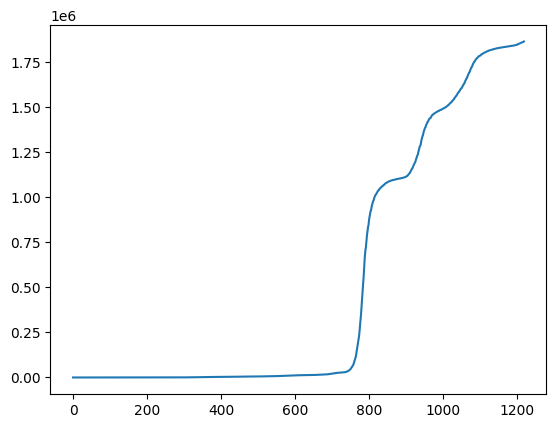

In [102]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [103]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 대구

In [104]:
city = '대구'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-20
1,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-21
2,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-22
3,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-23
4,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [105]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

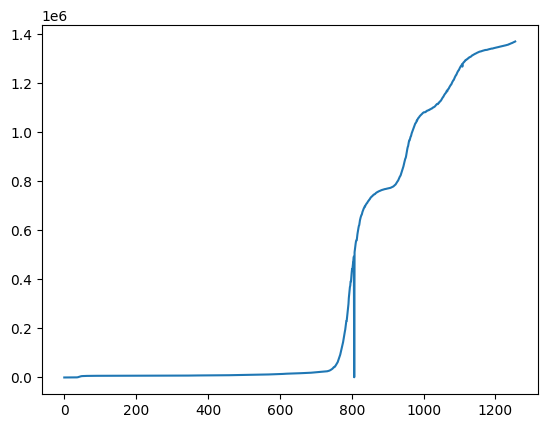

In [106]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [107]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,203,7924,대구,Daegu,29,7359,362,29,0,325.22,2021-01-04
351,203,7924,대구,Daegu,29,7357,364,29,0,325.22,2021-01-04
654,268,17307,대구,Daegu,66,16334,705,66,0,716.00,2021-11-03
655,265,17307,대구,Daegu,66,16297,679,66,0,716.00,2021-11-03
751,399,41756,대구,Daegu,1971,43726,0,1967,4,1750.00,2022-02-07
752,399,43726,대구,Daegu,1971,30877,0,1967,4,1833.00,2022-02-07
753,399,43726,대구,Daegu,1971,43726,0,1967,4,1833.00,2022-02-07
785,607,230261,대구,Daegu,10307,151483,0,10307,0,9653.00,2022-03-11
786,587,230261,대구,Daegu,10307,136100,0,10307,0,9653.00,2022-03-11
797,783,392298,대구,Daegu,17360,259941,0,17360,0,16446.00,2022-03-22


## 완전히 같은 데이터 추출

In [108]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,991,559685,대구,Daegu,3452,0,0,3452,0,23463.0,2022-04-04
814,991,559685,대구,Daegu,3452,0,0,3452,0,23463.0,2022-04-04
862,1310,747162,대구,Daegu,1316,0,0,1316,0,31322.0,2022-05-21
863,1310,747162,대구,Daegu,1316,0,0,1316,0,31322.0,2022-05-21
893,1343,768964,대구,Daegu,139,0,0,137,2,32236.0,2022-06-20
894,1343,768964,대구,Daegu,139,0,0,137,2,32236.0,2022-06-20
960,1430,967218,대구,Daegu,6307,0,0,6293,14,40547.0,2022-08-25
961,1430,967218,대구,Daegu,6307,0,0,6293,14,40547.0,2022-08-25
981,1579,1048878,대구,Daegu,5360,0,0,5351,9,43971.0,2022-09-14
982,1579,1048878,대구,Daegu,5360,0,0,5351,9,43971.0,2022-09-14


In [109]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [110]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,203,7924,대구,Daegu,29,7359,362,29,0,325.22,2021-01-04
351,203,7924,대구,Daegu,29,7357,364,29,0,325.22,2021-01-04
654,268,17307,대구,Daegu,66,16334,705,66,0,716.00,2021-11-03
655,265,17307,대구,Daegu,66,16297,679,66,0,716.00,2021-11-03
751,399,41756,대구,Daegu,1971,43726,0,1967,4,1750.00,2022-02-07
752,399,43726,대구,Daegu,1971,30877,0,1967,4,1833.00,2022-02-07
753,399,43726,대구,Daegu,1971,43726,0,1967,4,1833.00,2022-02-07
785,607,230261,대구,Daegu,10307,151483,0,10307,0,9653.00,2022-03-11
786,587,230261,대구,Daegu,10307,136100,0,10307,0,9653.00,2022-03-11
797,783,392298,대구,Daegu,17360,259941,0,17360,0,16446.00,2022-03-22


## 데이터 수정

In [111]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [112]:
print('n : 0 ~ ' + str(len(repair_index)-1))
#n = int(input())
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1020,1685,1110814,대구,Daegu,1556,0,0,1552,4,46567.0,2022-10-27
1021,1687,1112417,대구,Daegu,1604,0,0,1600,4,46634.0,2022-10-28
1022,1689,1114098,대구,Daegu,1681,0,0,1678,3,46705.0,2022-10-29
1023,1690,1115802,대구,Daegu,1704,0,0,1703,1,46776.0,2022-10-30
1024,1691,1116532,대구,Daegu,730,0,0,729,1,46807.0,2022-10-31
1025,1690,1115802,대구,Daegu,1704,0,0,1703,1,46776.0,2022-10-31
1026,1692,1118990,대구,Daegu,2459,0,0,2458,1,46910.0,2022-11-01
1027,1692,1121410,대구,Daegu,2420,0,0,2417,3,47011.0,2022-11-02
1028,1692,1123176,대구,Daegu,1767,0,0,1765,2,47085.0,2022-11-03
1029,1692,1125129,대구,Daegu,1953,0,0,1951,2,47167.0,2022-11-04


In [113]:
del_index = [350, 654, 751, 753, 785, 797, 802, 807, 835, 1024, 1049, 1092, 1154, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-20
1,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-21
2,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-22
3,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-23
4,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-24
5,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-25
6,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-26
7,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-27
8,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-28
9,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-29


In [114]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [115]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


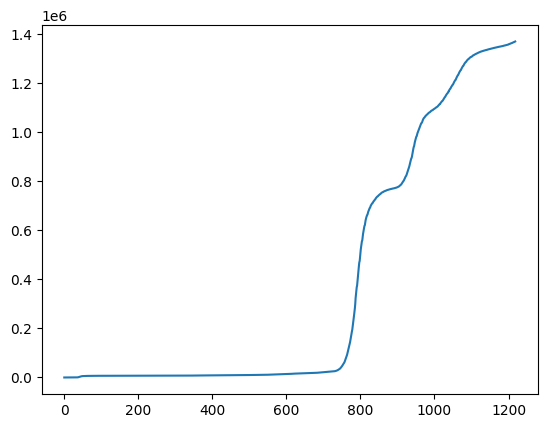

In [116]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [117]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 인천

In [151]:
city = '인천'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,1,인천,Incheon,0,0,1,0,1,0.0,2020-01-20
1,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-21
2,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-22
3,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-23
4,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-24


## 결측치 확인

In [152]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

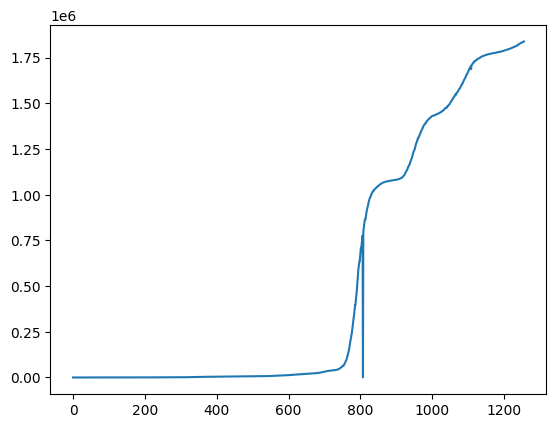

In [153]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [154]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,30,3126,인천,Incheon,103,2249,847,101,2,105.75,2021-01-04
351,30,3126,인천,Incheon,103,2249,847,101,2,105.75,2021-01-04
654,109,19796,인천,Incheon,183,17742,1945,181,2,673.00,2021-11-03
655,109,19796,인천,Incheon,183,17676,1828,181,2,673.00,2021-11-03
751,342,62492,인천,Incheon,2376,64867,0,2366,10,2120.00,2022-02-07
752,342,64867,인천,Incheon,2376,42802,0,2366,10,2200.00,2022-02-07
753,342,64867,인천,Incheon,2376,64867,0,2366,10,2200.00,2022-02-07
785,577,395433,인천,Incheon,17458,103745,0,17457,1,13412.00,2022-03-11
786,595,395433,인천,Incheon,17458,115210,0,17457,1,13412.00,2022-03-11
797,838,634945,인천,Incheon,17569,167661,0,17568,1,21535.00,2022-03-22


## 완전히 같은 데이터 추출

In [155]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 46개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,30,3126,인천,Incheon,103,2249,847,101,2,105.75,2021-01-04
351,30,3126,인천,Incheon,103,2249,847,101,2,105.75,2021-01-04
813,1094,864639,인천,Incheon,5545,0,0,5545,0,29326.00,2022-04-04
814,1094,864639,인천,Incheon,5545,0,0,5545,0,29326.00,2022-04-04
862,1383,1065504,인천,Incheon,1064,0,0,1064,0,36139.00,2022-05-21
863,1383,1065504,인천,Incheon,1064,0,0,1064,0,36139.00,2022-05-21
893,1405,1079315,인천,Incheon,222,0,0,188,34,36607.00,2022-06-20
894,1405,1079315,인천,Incheon,222,0,0,188,34,36607.00,2022-06-20
960,1468,1308817,인천,Incheon,5796,0,0,5729,67,44391.00,2022-08-25
961,1468,1308817,인천,Incheon,5796,0,0,5729,67,44391.00,2022-08-25


In [156]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [157]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 25개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
653,109,19796,인천,Incheon,183,17742,1945,181,2,673.0,2021-11-03
654,109,19796,인천,Incheon,183,17676,1828,181,2,673.0,2021-11-03
750,342,62492,인천,Incheon,2376,64867,0,2366,10,2120.0,2022-02-07
751,342,64867,인천,Incheon,2376,42802,0,2366,10,2200.0,2022-02-07
752,342,64867,인천,Incheon,2376,64867,0,2366,10,2200.0,2022-02-07
784,577,395433,인천,Incheon,17458,103745,0,17457,1,13412.0,2022-03-11
785,595,395433,인천,Incheon,17458,115210,0,17457,1,13412.0,2022-03-11
796,838,634945,인천,Incheon,17569,167661,0,17568,1,21535.0,2022-03-22
797,838,634945,인천,Incheon,17568,167661,0,1,17569,21535.0,2022-03-22
800,903,706346,인천,Incheon,21773,190339,0,21773,0,23957.0,2022-03-25


## 데이터 수정

In [158]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[653, 750, 784, 796, 800, 806, 834, 1023, 1048, 1090, 1152, 1167]

In [160]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 9
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 11


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1086,1748,1686864,인천,Incheon,3976,0,0,3975,1,57213.0,2022-12-31
1087,1750,1690499,인천,Incheon,3635,0,0,3619,16,57337.0,2023-01-01
1088,1755,1691843,인천,Incheon,1344,0,0,1344,0,57382.0,2023-01-02
1089,1756,1697034,인천,Incheon,5191,0,0,5178,13,57558.0,2023-01-03
1090,1759,1701842,인천,Incheon,4808,0,0,4732,76,57721.0,2023-01-04
1091,1759,1686864,인천,Incheon,4808,0,0,4732,76,57213.0,2023-01-04
1092,1772,1705930,인천,Incheon,4088,0,0,4000,88,57860.0,2023-01-05
1093,1780,1709472,인천,Incheon,3542,0,0,3413,129,57980.0,2023-01-06
1094,1783,1712837,인천,Incheon,3381,0,0,3339,42,58094.0,2023-01-07
1095,1785,1715911,인천,Incheon,3074,0,0,3049,25,58199.0,2023-01-08


In [161]:
del_index = [654, 750, 751, 785, 796, 801, 806, 835, 1023, 1049, 1091, 1152, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,1,인천,Incheon,0,0,1,0,1,0.0,2020-01-20
1,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-21
2,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-22
3,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-23
4,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-24
5,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-25
6,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-26
7,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-27
8,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-28
9,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-29


In [162]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [163]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [164]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


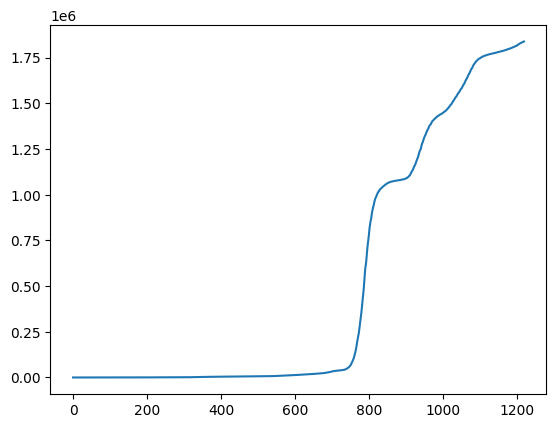

In [165]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [166]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 광주

In [167]:
city = '광주'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-20
1,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-21
2,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-22
3,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-23
4,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [168]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

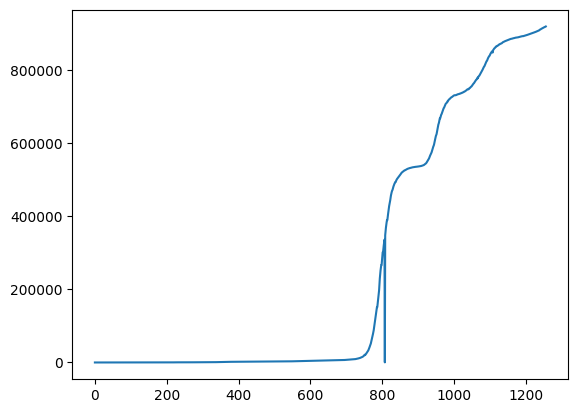

In [169]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [170]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,7,1211,광주,Gwangju,74,888,316,74,0,83.13,2021-01-04
351,7,1211,광주,Gwangju,74,889,315,74,0,83.13,2021-01-04
654,29,5405,광주,Gwangju,12,5280,96,11,1,373.00,2021-11-03
655,29,5405,광주,Gwangju,12,5274,90,11,1,373.00,2021-11-03
751,99,21288,광주,Gwangju,1209,21288,0,1205,4,1477.00,2022-02-07
752,99,20079,광주,Gwangju,1209,21288,0,1205,4,1393.00,2022-02-07
753,99,21288,광주,Gwangju,1209,11548,0,1205,4,1477.00,2022-02-07
785,150,151646,광주,Gwangju,8848,14727,0,8836,12,10519.00,2022-03-11
786,160,151646,광주,Gwangju,8848,14807,0,8836,12,10519.00,2022-03-11
797,271,267168,광주,Gwangju,6985,15090,0,1,6986,18533.00,2022-03-22


## 완전히 같은 데이터 추출

In [171]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,386,390095,광주,Gwangju,5801,0,0,5801,0,27060.0,2022-04-04
814,386,390095,광주,Gwangju,5801,0,0,5801,0,27060.0,2022-04-04
862,549,526562,광주,Gwangju,751,0,0,749,2,36526.0,2022-05-21
863,549,526562,광주,Gwangju,751,0,0,749,2,36526.0,2022-05-21
893,564,536126,광주,Gwangju,116,0,0,107,9,37189.0,2022-06-20
894,564,536126,광주,Gwangju,116,0,0,107,9,37189.0,2022-06-20
960,607,668865,광주,Gwangju,4140,0,0,4124,16,46397.0,2022-08-25
961,607,668865,광주,Gwangju,4140,0,0,4124,16,46397.0,2022-08-25
981,637,715090,광주,Gwangju,2532,0,0,2519,13,49604.0,2022-09-14
982,637,715090,광주,Gwangju,2532,0,0,2519,13,49604.0,2022-09-14


In [172]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [173]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,7,1211,광주,Gwangju,74,888,316,74,0,83.13,2021-01-04
351,7,1211,광주,Gwangju,74,889,315,74,0,83.13,2021-01-04
654,29,5405,광주,Gwangju,12,5280,96,11,1,373.00,2021-11-03
655,29,5405,광주,Gwangju,12,5274,90,11,1,373.00,2021-11-03
751,99,21288,광주,Gwangju,1209,21288,0,1205,4,1477.00,2022-02-07
752,99,20079,광주,Gwangju,1209,21288,0,1205,4,1393.00,2022-02-07
753,99,21288,광주,Gwangju,1209,11548,0,1205,4,1477.00,2022-02-07
785,150,151646,광주,Gwangju,8848,14727,0,8836,12,10519.00,2022-03-11
786,160,151646,광주,Gwangju,8848,14807,0,8836,12,10519.00,2022-03-11
797,271,267168,광주,Gwangju,6985,15090,0,1,6986,18533.00,2022-03-22


## 데이터 수정

In [174]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [175]:
print('n : 0 ~ ' + str(len(repair_index)-1))
#n = int(input())
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1045,725,774426,광주,Gwangju,1475,0,0,1475,0,53719.0,2022-11-20
1046,725,774975,광주,Gwangju,549,0,0,548,1,53758.0,2022-11-21
1047,727,776491,광주,Gwangju,1516,0,0,1516,0,53863.0,2022-11-22
1048,728,778668,광주,Gwangju,2177,0,0,2176,1,54014.0,2022-11-23
1049,730,780352,광주,Gwangju,1684,0,0,1684,0,54131.0,2022-11-24
1050,730,778668,광주,Gwangju,1684,0,0,1684,0,54014.0,2022-11-24
1051,730,782014,광주,Gwangju,1662,0,0,1662,0,54246.0,2022-11-25
1052,730,783616,광주,Gwangju,1604,0,0,1602,2,54357.0,2022-11-26
1053,731,785070,광주,Gwangju,1454,0,0,1454,0,54458.0,2022-11-27
1054,732,785828,광주,Gwangju,758,0,0,758,0,54510.0,2022-11-28


In [176]:
del_index = [350, 654, 752, 753, 786, 797, 801, 807, 836, 1024, 1050, 1091, 1154, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-20
1,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-21
2,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-22
3,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-23
4,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-24
5,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-25
6,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-26
7,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-27
8,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-28
9,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-29


In [177]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [178]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [179]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


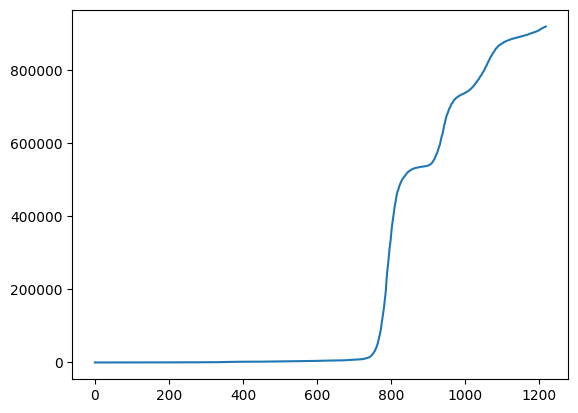

In [180]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [181]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 대전

In [195]:
city = '대전'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-20
1,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-21
2,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-22
3,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-23
4,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [196]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

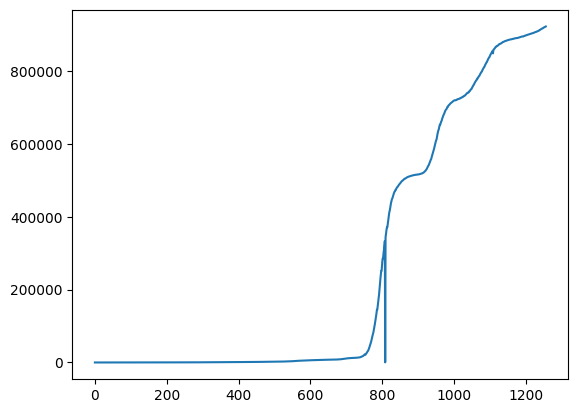

In [197]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [198]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,7,874,대전,Daejeon,6,720,147,6,0,59.29,2021-01-04
351,7,874,대전,Daejeon,6,725,142,6,0,59.29,2021-01-04
654,55,7588,대전,Daejeon,19,7372,142,19,0,518.00,2021-11-03
655,55,7588,대전,Daejeon,19,7392,141,19,0,518.00,2021-11-03
751,199,22181,대전,Daejeon,969,13096,0,968,1,1527.00,2022-02-07
752,199,22181,대전,Daejeon,969,22181,0,968,1,1527.00,2022-02-07
753,199,21212,대전,Daejeon,969,22181,0,968,1,1461.00,2022-02-07
785,292,144788,대전,Daejeon,7212,34669,0,7212,0,9970.00,2022-03-11
786,291,144788,대전,Daejeon,7212,34668,0,7212,0,9970.00,2022-03-11
797,340,251780,대전,Daejeon,9873,59220,0,0,9873,17337.00,2022-03-22


## 완전히 같은 데이터 추출

In [199]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 46개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,447,371332,대전,Daejeon,4586,0,0,4586,0,25569.0,2022-04-04
814,447,371332,대전,Daejeon,4586,0,0,4586,0,25569.0,2022-04-04
836,612,472793,대전,Daejeon,2478,0,0,2477,1,32556.0,2022-04-26
837,612,472793,대전,Daejeon,2478,0,0,2477,1,32556.0,2022-04-26
862,682,504389,대전,Daejeon,743,0,0,743,0,34732.0,2022-05-21
863,682,504389,대전,Daejeon,743,0,0,743,0,34732.0,2022-05-21
893,706,515168,대전,Daejeon,91,0,0,87,4,35474.0,2022-06-20
894,706,515168,대전,Daejeon,91,0,0,87,4,35474.0,2022-06-20
960,757,652618,대전,Daejeon,3661,0,0,3645,16,44938.0,2022-08-25
961,757,652618,대전,Daejeon,3661,0,0,3645,16,44938.0,2022-08-25


In [200]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [201]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 25개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,7,874,대전,Daejeon,6,720,147,6,0,59.29,2021-01-04
351,7,874,대전,Daejeon,6,725,142,6,0,59.29,2021-01-04
654,55,7588,대전,Daejeon,19,7372,142,19,0,518.00,2021-11-03
655,55,7588,대전,Daejeon,19,7392,141,19,0,518.00,2021-11-03
751,199,22181,대전,Daejeon,969,13096,0,968,1,1527.00,2022-02-07
752,199,22181,대전,Daejeon,969,22181,0,968,1,1527.00,2022-02-07
753,199,21212,대전,Daejeon,969,22181,0,968,1,1461.00,2022-02-07
785,292,144788,대전,Daejeon,7212,34669,0,7212,0,9970.00,2022-03-11
786,291,144788,대전,Daejeon,7212,34668,0,7212,0,9970.00,2022-03-11
797,340,251780,대전,Daejeon,9873,59220,0,0,9873,17337.00,2022-03-22


## 데이터 수정

In [202]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 1023, 1048, 1090, 1152, 1167]

In [204]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 6
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 11


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
803,376,297036,대전,Daejeon,11202,118865,0,11202,0,20453.0,2022-03-26
804,388,305999,대전,Daejeon,8963,118865,0,8963,0,21071.0,2022-03-27
805,391,311280,대전,Daejeon,5281,118865,0,5281,0,21434.0,2022-03-28
806,395,322386,대전,Daejeon,11124,0,0,11124,0,22199.0,2022-03-29
807,409,333638,대전,Daejeon,11252,0,0,11252,0,22974.0,2022-03-30
808,409,409,대전,Daejeon,11252,0,0,11252,0,28.0,2022-03-30
809,418,343696,대전,Daejeon,10058,0,0,10058,0,23666.0,2022-03-31
810,430,351789,대전,Daejeon,8093,0,0,8093,0,24224.0,2022-04-01
811,438,359774,대전,Daejeon,7989,0,0,7989,0,24774.0,2022-04-02
812,445,366746,대전,Daejeon,6972,0,0,6972,0,25254.0,2022-04-03


In [205]:
del_index = [351, 654, 752, 753, 786, 798, 801, 808, 1023, 1049, 1091, 1153, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-20
1,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-21
2,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-22
3,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-23
4,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-24
5,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-25
6,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-26
7,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-27
8,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-28
9,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-29


##### 2022-02-07 isoClearCnt 값이 이상함

In [206]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [207]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [208]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


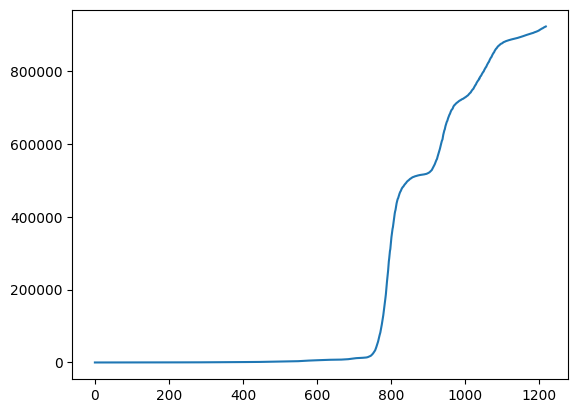

In [209]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [210]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 울산

In [224]:
city = '울산'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-20
1,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-21
2,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-22
3,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-23
4,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [225]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

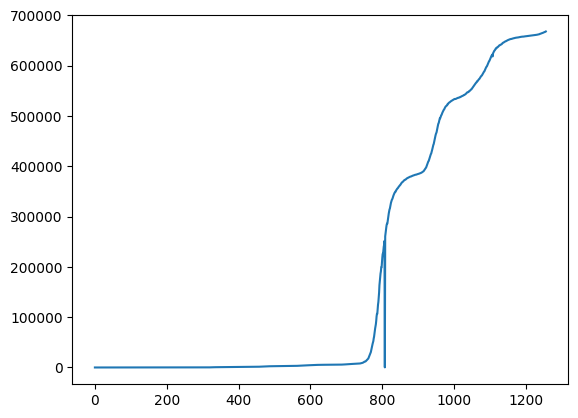

In [226]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [227]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,30,745,울산,Ulsan,5,498,217,5,0,64.95,2021-01-04
351,30,745,울산,Ulsan,5,498,217,5,0,64.95,2021-01-04
654,56,5447,울산,Ulsan,7,5331,60,6,1,479.00,2021-11-03
655,56,5447,울산,Ulsan,7,5329,55,6,1,479.00,2021-11-03
751,66,11406,울산,Ulsan,593,11999,0,592,1,1017.00,2022-02-07
752,66,11999,울산,Ulsan,593,8152,0,592,1,1070.00,2022-02-07
753,66,11999,울산,Ulsan,593,11999,0,592,1,1070.00,2022-02-07
785,118,106586,울산,Ulsan,5261,57384,0,5261,0,9503.00,2022-03-11
786,113,106586,울산,Ulsan,5261,57385,0,5261,0,9503.00,2022-03-11
797,188,199065,울산,Ulsan,8224,140460,0,0,8224,17748.00,2022-03-22


## 완전히 같은 데이터 추출

In [228]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 48개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,30,745,울산,Ulsan,5,498,217,5,0,64.95,2021-01-04
351,30,745,울산,Ulsan,5,498,217,5,0,64.95,2021-01-04
813,268,285853,울산,Ulsan,2481,0,0,2481,0,25486.00,2022-04-04
814,268,285853,울산,Ulsan,2481,0,0,2481,0,25486.00,2022-04-04
836,322,349482,울산,Ulsan,1753,0,0,1753,0,31159.00,2022-04-26
837,322,349482,울산,Ulsan,1753,0,0,1753,0,31159.00,2022-04-26
862,336,372720,울산,Ulsan,626,0,0,626,0,33231.00,2022-05-21
863,336,372720,울산,Ulsan,626,0,0,626,0,33231.00,2022-05-21
893,342,383183,울산,Ulsan,115,0,0,115,0,34164.00,2022-06-20
894,342,383183,울산,Ulsan,115,0,0,115,0,34164.00,2022-06-20


In [229]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [230]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 23개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
653,56,5447,울산,Ulsan,7,5331,60,6,1,479.0,2021-11-03
654,56,5447,울산,Ulsan,7,5329,55,6,1,479.0,2021-11-03
750,66,11406,울산,Ulsan,593,11999,0,592,1,1017.0,2022-02-07
751,66,11999,울산,Ulsan,593,8152,0,592,1,1070.0,2022-02-07
752,66,11999,울산,Ulsan,593,11999,0,592,1,1070.0,2022-02-07
784,118,106586,울산,Ulsan,5261,57384,0,5261,0,9503.0,2022-03-11
785,113,106586,울산,Ulsan,5261,57385,0,5261,0,9503.0,2022-03-11
796,188,199065,울산,Ulsan,8224,140460,0,0,8224,17748.0,2022-03-22
797,188,199065,울산,Ulsan,8224,140460,0,8224,0,17748.0,2022-03-22
800,210,225881,울산,Ulsan,7433,167090,0,0,7433,20139.0,2022-03-25


## 데이터 수정

In [231]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[653, 750, 784, 796, 800, 806, 1022, 1047, 1089, 1151, 1166]

In [232]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 8
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 10


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1085,500,618200,울산,Ulsan,1604,0,0,1603,1,55118.0,2022-12-31
1086,500,619633,울산,Ulsan,1433,0,0,1430,3,55246.0,2023-01-01
1087,501,620230,울산,Ulsan,597,0,0,596,1,55299.0,2023-01-02
1088,502,621845,울산,Ulsan,1615,0,0,1615,0,55443.0,2023-01-03
1089,503,618200,울산,Ulsan,2182,0,0,2180,2,55118.0,2023-01-04
1090,503,624027,울산,Ulsan,2182,0,0,2180,2,55638.0,2023-01-04
1091,504,625656,울산,Ulsan,1629,0,0,1624,5,55783.0,2023-01-05
1092,506,627104,울산,Ulsan,1448,0,0,1443,5,55912.0,2023-01-06
1093,506,628523,울산,Ulsan,1423,0,0,1416,7,56038.0,2023-01-07
1094,507,629866,울산,Ulsan,1343,0,0,1340,3,56158.0,2023-01-08


In [233]:
del_index = [654, 751, 752, 784, 796, 801, 806, 1022, 1048, 1089, 1152, 1166]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-20
1,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-21
2,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-22
3,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-23
4,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-24
5,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-25
6,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-26
7,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-27
8,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-28
9,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-29


In [234]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [235]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [236]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


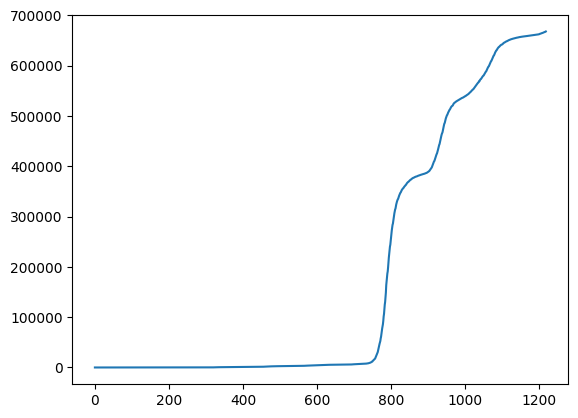

In [237]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [238]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 세종

In [252]:
city = '세종'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-20
1,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-21
2,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-22
3,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-23
4,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-24


## 결측치 확인

In [253]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

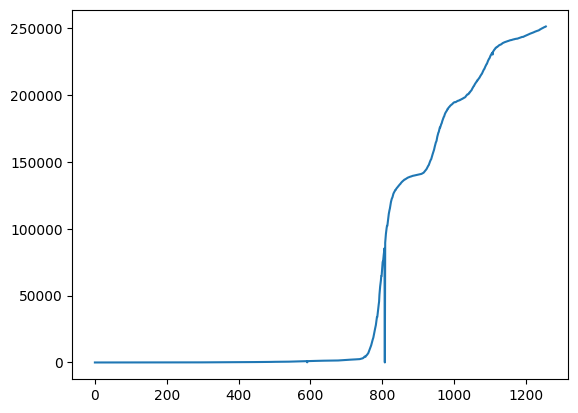

In [254]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [255]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,1,154.0,세종,Sejong,0.0,132,21.0,0,0,44.99,2021-01-04
351,1,154.0,세종,Sejong,0.0,132,21.0,0,0,44.99,2021-01-04
654,2,1373.0,세종,Sejong,1.0,1346,25.0,1,0,386.00,2021-11-03
655,2,1373.0,세종,Sejong,1.0,1345,25.0,1,0,386.00,2021-11-03
751,4,4451.0,세종,Sejong,262.0,4451,0.0,261,1,1197.00,2022-02-07
752,4,4451.0,세종,Sejong,262.0,2804,0.0,261,1,1197.00,2022-02-07
753,4,4189.0,세종,Sejong,262.0,4451,0.0,261,1,1126.00,2022-02-07
785,6,33965.0,세종,Sejong,1840.0,19962,0.0,1840,0,9133.00,2022-03-11
786,6,33965.0,세종,Sejong,1840.0,19962,0.0,1840,0,9133.00,2022-03-11
797,14,64613.0,세종,Sejong,3334.0,42724,0.0,0,3334,17374.00,2022-03-22


## 완전히 같은 데이터 추출

In [256]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 50개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,1,154.0,세종,Sejong,0.0,132,21.0,0,0,44.99,2021-01-04
351,1,154.0,세종,Sejong,0.0,132,21.0,0,0,44.99,2021-01-04
785,6,33965.0,세종,Sejong,1840.0,19962,0.0,1840,0,9133.00,2022-03-11
786,6,33965.0,세종,Sejong,1840.0,19962,0.0,1840,0,9133.00,2022-03-11
813,29,102167.0,세종,Sejong,1630.0,0,0.0,1630,0,27472.00,2022-04-04
814,29,102167.0,세종,Sejong,1630.0,0,0.0,1630,0,27472.00,2022-04-04
836,34,128936.0,세종,Sejong,666.0,0,0.0,666,0,34670.00,2022-04-26
837,34,128936.0,세종,Sejong,666.0,0,0.0,666,0,34670.00,2022-04-26
862,35,136806.0,세종,Sejong,209.0,0,0.0,209,0,36786.00,2022-05-21
863,35,136806.0,세종,Sejong,209.0,0,0.0,209,0,36786.00,2022-05-21


In [257]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [258]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 21개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
653,2,1373.0,세종,Sejong,1.0,1346,25.0,1,0,386.0,2021-11-03
654,2,1373.0,세종,Sejong,1.0,1345,25.0,1,0,386.0,2021-11-03
750,4,4451.0,세종,Sejong,262.0,4451,0.0,261,1,1197.0,2022-02-07
751,4,4451.0,세종,Sejong,262.0,2804,0.0,261,1,1197.0,2022-02-07
752,4,4189.0,세종,Sejong,262.0,4451,0.0,261,1,1126.0,2022-02-07
795,14,64613.0,세종,Sejong,3334.0,42724,0.0,0,3334,17374.0,2022-03-22
796,14,64613.0,세종,Sejong,3334.0,42724,0.0,3334,0,17374.0,2022-03-22
799,18,75297.0,세종,Sejong,3486.0,52514,0.0,3486,0,20247.0,2022-03-25
800,18,75297.0,세종,Sejong,3486.0,52514,0.0,0,3486,20247.0,2022-03-25
805,21,21.0,세종,Sejong,4248.0,0,0.0,4248,0,6.0,2022-03-30


## 데이터 수정

In [259]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[653, 750, 795, 799, 805, 1021, 1046, 1088, 1150, 1165]

In [265]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n =4
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 9


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
801,19,78304.0,세종,Sejong,3007.0,54882,0.0,3007,0,21055.0,2022-03-26
802,20,80648.0,세종,Sejong,2344.0,54882,0.0,2344,0,21686.0,2022-03-27
803,21,82866.0,세종,Sejong,2218.0,54882,0.0,2218,0,22282.0,2022-03-28
804,21,85341.0,세종,Sejong,2476.0,0,0.0,2476,0,22948.0,2022-03-29
805,21,21.0,세종,Sejong,4248.0,0,0.0,4248,0,6.0,2022-03-30
806,21,89587.0,세종,Sejong,4248.0,0,0.0,4248,0,24089.0,2022-03-30
807,23,93479.0,세종,Sejong,3892.0,0,0.0,3892,0,25136.0,2022-03-31
808,26,96207.0,세종,Sejong,2729.0,0,0.0,2729,0,25869.0,2022-04-01
809,27,98576.0,세종,Sejong,2370.0,0,0.0,2370,0,26506.0,2022-04-02
810,29,100537.0,세종,Sejong,1961.0,0,0.0,1961,0,27034.0,2022-04-03


In [266]:
del_index = [653, 750, 751, 796, 800, 805, 1021, 1046, 1088, 1150, 1165]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-20
1,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-21
2,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-22
3,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-23
4,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-24
5,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-25
6,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-26
7,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-27
8,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-28
9,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-29


In [267]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [268]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [269]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
590,1,100.3,세종,Sejong,-892.7,0,99.3,10,0,28.19,2021-09-01


In [270]:
df_final.iloc[586: 596]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
586,1,975.0,세종,Sejong,12.0,877,97.0,12,0,274.01,2021-08-28
587,1,977.0,세종,Sejong,2.0,883,93.0,2,0,274.57,2021-08-29
588,1,985.0,세종,Sejong,8.0,888,96.0,8,0,276.82,2021-08-30
589,1,993.0,세종,Sejong,8.0,891,101.0,8,0,279.07,2021-08-31
590,1,100.3,세종,Sejong,-892.7,0,99.3,10,0,28.19,2021-09-01
591,1,1010.0,세종,Sejong,909.7,906,103.0,7,0,283.84,2021-09-02
592,1,1014.0,세종,Sejong,4.0,915,98.0,4,0,284.97,2021-09-03
593,1,1022.0,세종,Sejong,8.0,937,84.0,8,0,287.21,2021-09-04
594,1,1025.0,세종,Sejong,3.0,949,75.0,3,0,288.06,2021-09-05
595,1,1029.0,세종,Sejong,4.0,952,76.0,4,0,289.18,2021-09-06


In [271]:
df_final.loc[590, ['defCnt', 'incDec']] = [1003, 10]
df_final.loc[591, 'incDec'] = 7
df_final.iloc[589:593]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
589,1,993.0,세종,Sejong,8.0,891,101.0,8,0,279.07,2021-08-31
590,1,1003.0,세종,Sejong,10.0,0,99.3,10,0,28.19,2021-09-01
591,1,1010.0,세종,Sejong,7.0,906,103.0,7,0,283.84,2021-09-02
592,1,1014.0,세종,Sejong,4.0,915,98.0,4,0,284.97,2021-09-03


##### 2021-09-01 defCnt 값이 1003인데 100.3으로 오기입 된 것으로 판단
=> 데이터를 저장할 때 defCnt를 입력하고 차분하여 incDec를 구하여서 -892.7, 909.7이 나온 것으로 판단   
=> 데이터를 수정

In [272]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


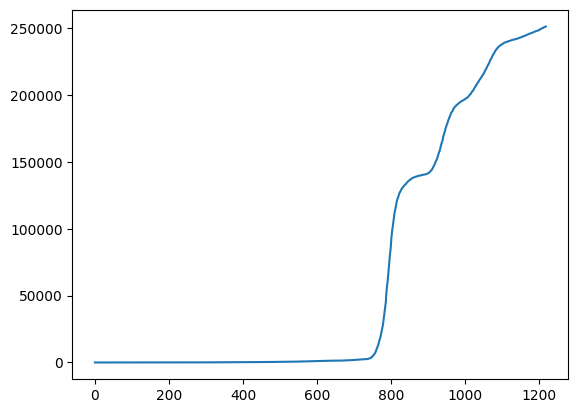

In [273]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [274]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 경기

In [308]:
city = '경기'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-20
1,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-21
2,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-22
3,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-23
4,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-24


## 결측치 확인

In [309]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

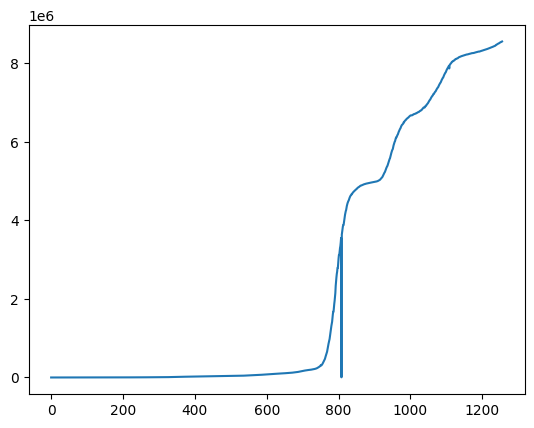

In [310]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [311]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,292,15434,경기,Gyeonggi-do,268,11190,3952,260,8,116.48,2021-01-04
351,292,15433,경기,Gyeonggi-do,268,11181,3960,260,8,116.47,2021-01-04
654,946,110427,경기,Gyeonggi-do,899,100698,8783,895,4,822,2021-11-03
655,939,110427,경기,Gyeonggi-do,899,100173,8416,895,4,822,2021-11-03
751,2195,316684,경기,Gyeonggi-do,9805,173276,0,9780,25,2334,2022-02-07
752,2195,306879,경기,Gyeonggi-do,9805,316684,0,9780,25,2262,2022-02-07
753,2195,316684,경기,Gyeonggi-do,9805,316684,0,9780,25,2334,2022-02-07
785,2837,1675373,경기,Gyeonggi-do,72427,233464,0,72420,7,12350,2022-03-11
786,2883,1675373,경기,Gyeonggi-do,72427,233813,0,72420,7,12350,2022-03-11
797,3609,2788761,경기,Gyeonggi-do,96257,439083,0,96256,1,20558,2022-03-22


## 완전히 같은 데이터 추출

In [312]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 42개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,4588,3883961,경기,Gyeonggi-do,36937,0,0,36937,0,28631,2022-04-04
814,4588,3883961,경기,Gyeonggi-do,36937,0,0,36937,0,28631,2022-04-04
862,6174,4887196,경기,Gyeonggi-do,5693,0,0,5693,0,36027,2022-05-21
863,6174,4887196,경기,Gyeonggi-do,5693,0,0,5693,0,36027,2022-05-21
893,6255,4965875,경기,Gyeonggi-do,886,0,0,884,2,36607,2022-06-20
894,6255,4965875,경기,Gyeonggi-do,886,0,0,884,2,36607,2022-06-20
960,6715,6109867,경기,Gyeonggi-do,27032,0,0,27007,25,45040,2022-08-25
961,6715,6109867,경기,Gyeonggi-do,27032,0,0,27007,25,45040,2022-08-25
981,6963,6495551,경기,Gyeonggi-do,26133,0,0,26110,23,47883,2022-09-14
982,6963,6495551,경기,Gyeonggi-do,26133,0,0,26110,23,47883,2022-09-14


In [313]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [314]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 29개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,292,15434,경기,Gyeonggi-do,268,11190,3952,260,8,116.48,2021-01-04
351,292,15433,경기,Gyeonggi-do,268,11181,3960,260,8,116.47,2021-01-04
654,946,110427,경기,Gyeonggi-do,899,100698,8783,895,4,822,2021-11-03
655,939,110427,경기,Gyeonggi-do,899,100173,8416,895,4,822,2021-11-03
751,2195,316684,경기,Gyeonggi-do,9805,173276,0,9780,25,2334,2022-02-07
752,2195,306879,경기,Gyeonggi-do,9805,316684,0,9780,25,2262,2022-02-07
753,2195,316684,경기,Gyeonggi-do,9805,316684,0,9780,25,2334,2022-02-07
785,2837,1675373,경기,Gyeonggi-do,72427,233464,0,72420,7,12350,2022-03-11
786,2883,1675373,경기,Gyeonggi-do,72427,233813,0,72420,7,12350,2022-03-11
797,3609,2788761,경기,Gyeonggi-do,96257,439083,0,96256,1,20558,2022-03-22


## 데이터 수정

In [315]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1100, 1154, 1169]

In [319]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 13
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 13


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1165,8346,8289348,경기,Gyeonggi-do,2776,0,0,2774,2,60998,2023-03-16
1166,8346,8291839,경기,Gyeonggi-do,2491,0,0,2491,0,61017,2023-03-17
1167,8347,8294433,경기,Gyeonggi-do,2637,0,0,2633,4,61036,2023-03-18
1168,0,8296887,경기,Gyeonggi-do,2454,0,0,2453,1,61054,2023-03-19
1169,8349,8298093,경기,Gyeonggi-do,1206,0,0,1206,0,61063,2023-03-20
1170,8349,8296887,경기,Gyeonggi-do,2454,0,0,2453,1,61054,2023-03-20
1171,8351,8301571,경기,Gyeonggi-do,3478,0,0,3476,2,61088,2023-03-21
1172,8351,8305416,경기,Gyeonggi-do,3845,0,0,3838,7,61117,2023-03-22
1173,8354,8308732,경기,Gyeonggi-do,3316,0,0,3311,5,61141,2023-03-23
1174,8357,8311777,경기,Gyeonggi-do,3045,0,0,3045,0,61164,2023-03-24


In [320]:
del_index = [351, 654, 751, 752, 785, 797, 802, 808, 835, 1024, 1050, 1092, 1101, 1154, 1170]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-20
1,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-21
2,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-22
3,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-23
4,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-24
5,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-25
6,0,1,경기,Gyeonggi-do,1,0,1,0,1,0.00,2020-01-26
7,0,2,경기,Gyeonggi-do,1,0,2,0,1,0.00,2020-01-27
8,0,2,경기,Gyeonggi-do,0,0,2,0,0,0.00,2020-01-28
9,0,2,경기,Gyeonggi-do,0,0,2,0,0,0.00,2020-01-29


In [321]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [322]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [323]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


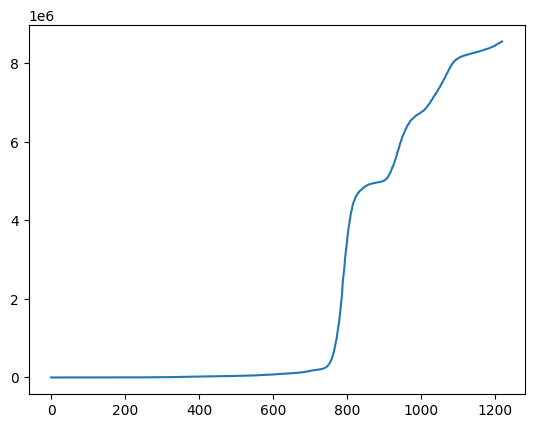

In [324]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [325]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 강원

In [326]:
city = '강원'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [327]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

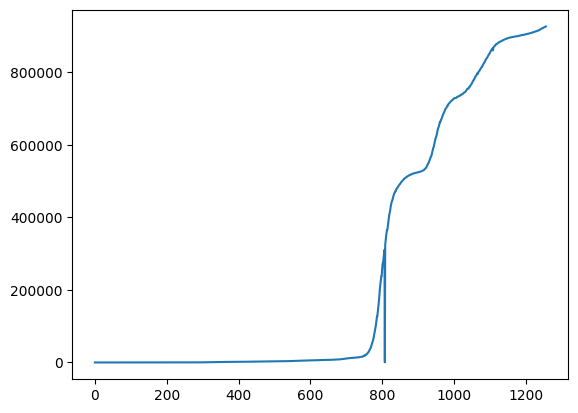

In [328]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [329]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,17,1329,강원,Gangwon-do,28,937,375,28,0,86.27,2021-01-04
351,17,1329,강원,Gangwon-do,28,938,374,28,0,86.27,2021-01-04
654,67,7270,강원,Gangwon-do,29,6943,231,29,0,471.00,2021-11-03
655,67,7270,강원,Gangwon-do,29,6964,239,29,0,471.00,2021-11-03
751,122,19916,강원,Gangwon-do,740,15079,0,738,2,1295.00,2022-02-07
752,122,19177,강원,Gangwon-do,740,19916,0,738,2,1246.00,2022-02-07
753,122,19916,강원,Gangwon-do,740,19916,0,738,2,1295.00,2022-02-07
785,225,126407,강원,Gangwon-do,7482,46484,0,7480,2,8216.00,2022-03-11
786,219,126407,강원,Gangwon-do,7482,37461,0,7480,2,8216.00,2022-03-11
797,344,237251,강원,Gangwon-do,10428,92225,0,0,10428,15421.00,2022-03-22


## 완전히 같은 데이터 추출

In [330]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,515,364982,강원,Gangwon-do,5217,0,0,5216,1,23723.0,2022-04-04
814,515,364982,강원,Gangwon-do,5217,0,0,5216,1,23723.0,2022-04-04
862,828,507450,강원,Gangwon-do,1103,0,0,1103,0,32984.0,2022-05-21
863,828,507450,강원,Gangwon-do,1103,0,0,1103,0,32984.0,2022-05-21
893,869,522477,강원,Gangwon-do,154,0,0,154,0,33960.0,2022-06-20
894,869,522477,강원,Gangwon-do,154,0,0,154,0,33960.0,2022-06-20
960,942,661677,강원,Gangwon-do,3329,0,0,3311,18,43008.0,2022-08-25
961,942,661677,강원,Gangwon-do,3329,0,0,3311,18,43008.0,2022-08-25
981,1017,707376,강원,Gangwon-do,2917,0,0,2916,1,45979.0,2022-09-14
982,1017,707376,강원,Gangwon-do,2917,0,0,2916,1,45979.0,2022-09-14


In [331]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [332]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,17,1329,강원,Gangwon-do,28,937,375,28,0,86.27,2021-01-04
351,17,1329,강원,Gangwon-do,28,938,374,28,0,86.27,2021-01-04
654,67,7270,강원,Gangwon-do,29,6943,231,29,0,471.00,2021-11-03
655,67,7270,강원,Gangwon-do,29,6964,239,29,0,471.00,2021-11-03
751,122,19916,강원,Gangwon-do,740,15079,0,738,2,1295.00,2022-02-07
752,122,19177,강원,Gangwon-do,740,19916,0,738,2,1246.00,2022-02-07
753,122,19916,강원,Gangwon-do,740,19916,0,738,2,1295.00,2022-02-07
785,225,126407,강원,Gangwon-do,7482,46484,0,7480,2,8216.00,2022-03-11
786,219,126407,강원,Gangwon-do,7482,37461,0,7480,2,8216.00,2022-03-11
797,344,237251,강원,Gangwon-do,10428,92225,0,0,10428,15421.00,2022-03-22


## 데이터 수정

In [333]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [334]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 6
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
803,409,283676,강원,Gangwon-do,10043,106402,0,10041,2,18439.0,2022-03-26
804,427,292936,강원,Gangwon-do,9260,106402,0,9256,4,19040.0,2022-03-27
805,432,299871,강원,Gangwon-do,6935,106402,0,6931,4,19491.0,2022-03-28
806,446,310379,강원,Gangwon-do,10508,0,0,10508,0,20174.0,2022-03-29
807,461,461,강원,Gangwon-do,13113,0,0,13113,0,30.0,2022-03-30
808,461,323486,강원,Gangwon-do,13113,0,0,13113,0,21026.0,2022-03-30
809,473,334151,강원,Gangwon-do,10665,0,0,10665,0,21719.0,2022-03-31
810,484,343213,강원,Gangwon-do,9064,0,0,9064,0,22308.0,2022-04-01
811,498,352269,강원,Gangwon-do,9056,0,0,9053,3,22897.0,2022-04-02
812,506,359765,강원,Gangwon-do,7496,0,0,7496,0,23384.0,2022-04-03


In [335]:
del_index = [351, 655, 751, 752, 786, 798, 802, 807, 836, 1024, 1050, 1092, 1154, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-29


In [336]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [337]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


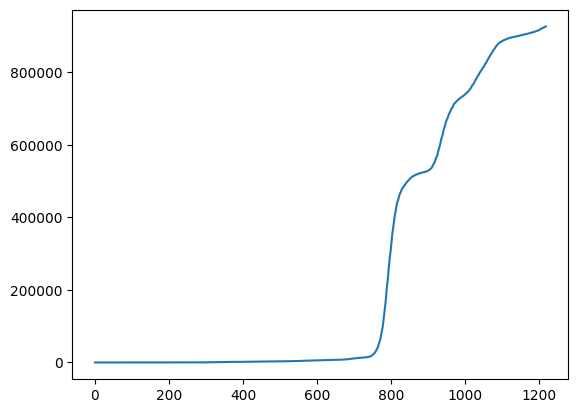

In [338]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [339]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 충북

In [354]:
city = '충북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [355]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

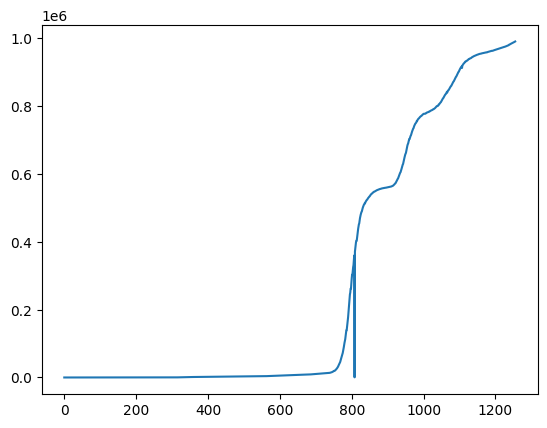

In [356]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [357]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,28,1271,충북,Chungcheongbuk-do,23,675,568,23,0,79.47,2021-01-04
351,28,1271,충북,Chungcheongbuk-do,23,676,567,23,0,79.47,2021-01-04
654,84,7993,충북,Chungcheongbuk-do,48,7502,407,47,1,499.00,2021-11-03
655,83,7993,충북,Chungcheongbuk-do,48,7473,389,47,1,499.00,2021-11-03
751,131,19081,충북,Chungcheongbuk-do,885,19966,0,884,1,1194.00,2022-02-07
752,131,19966,충북,Chungcheongbuk-do,885,19966,0,884,1,1250.00,2022-02-07
753,131,19966,충북,Chungcheongbuk-do,885,14248,0,884,1,1250.00,2022-02-07
785,219,138784,충북,Chungcheongbuk-do,7914,82735,0,7910,4,8688.00,2022-03-11
786,214,138784,충북,Chungcheongbuk-do,7914,72084,0,7910,4,8688.00,2022-03-11
797,344,262002,충북,Chungcheongbuk-do,11829,164491,0,11828,1,16402.00,2022-03-22


## 완전히 같은 데이터 추출

In [358]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,496,403201,충북,Chungcheongbuk-do,3956,0,0,3956,0,25241.0,2022-04-04
814,496,403201,충북,Chungcheongbuk-do,3956,0,0,3956,0,25241.0,2022-04-04
862,714,547584,충북,Chungcheongbuk-do,795,0,0,794,1,34279.0,2022-05-21
863,714,547584,충북,Chungcheongbuk-do,795,0,0,794,1,34279.0,2022-05-21
893,729,559160,충북,Chungcheongbuk-do,83,0,0,82,1,35004.0,2022-06-20
894,729,559160,충북,Chungcheongbuk-do,83,0,0,82,1,35004.0,2022-06-20
960,798,702559,충북,Chungcheongbuk-do,3811,0,0,3797,14,43981.0,2022-08-25
961,798,702559,충북,Chungcheongbuk-do,3811,0,0,3797,14,43981.0,2022-08-25
981,830,755791,충북,Chungcheongbuk-do,3166,0,0,3143,23,47313.0,2022-09-14
982,830,755791,충북,Chungcheongbuk-do,3166,0,0,3143,23,47313.0,2022-09-14


In [359]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [360]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,28,1271,충북,Chungcheongbuk-do,23,675,568,23,0,79.47,2021-01-04
351,28,1271,충북,Chungcheongbuk-do,23,676,567,23,0,79.47,2021-01-04
654,84,7993,충북,Chungcheongbuk-do,48,7502,407,47,1,499.00,2021-11-03
655,83,7993,충북,Chungcheongbuk-do,48,7473,389,47,1,499.00,2021-11-03
751,131,19081,충북,Chungcheongbuk-do,885,19966,0,884,1,1194.00,2022-02-07
752,131,19966,충북,Chungcheongbuk-do,885,19966,0,884,1,1250.00,2022-02-07
753,131,19966,충북,Chungcheongbuk-do,885,14248,0,884,1,1250.00,2022-02-07
785,219,138784,충북,Chungcheongbuk-do,7914,82735,0,7910,4,8688.00,2022-03-11
786,214,138784,충북,Chungcheongbuk-do,7914,72084,0,7910,4,8688.00,2022-03-11
797,344,262002,충북,Chungcheongbuk-do,11829,164491,0,11828,1,16402.00,2022-03-22


## 데이터 수정

In [361]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [363]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 10
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1087,968,912347,충북,Chungcheongbuk-do,1865,0,0,1865,0,57114.0,2022-12-31
1088,970,913921,충북,Chungcheongbuk-do,1574,0,0,1574,0,57212.0,2023-01-01
1089,970,914807,충북,Chungcheongbuk-do,886,0,0,885,1,57268.0,2023-01-02
1090,971,916906,충북,Chungcheongbuk-do,2099,0,0,2098,1,57399.0,2023-01-03
1091,973,912347,충북,Chungcheongbuk-do,2396,0,0,2395,1,57114.0,2023-01-04
1092,973,919302,충북,Chungcheongbuk-do,2396,0,0,2395,1,57549.0,2023-01-04
1093,975,921230,충북,Chungcheongbuk-do,1928,0,0,1921,7,57670.0,2023-01-05
1094,976,922879,충북,Chungcheongbuk-do,1649,0,0,1648,1,57773.0,2023-01-06
1095,980,924406,충북,Chungcheongbuk-do,1533,0,0,1521,12,57868.0,2023-01-07
1096,982,925849,충북,Chungcheongbuk-do,1443,0,0,1440,3,57959.0,2023-01-08


In [364]:
del_index = [351, 655, 751, 752, 786, 797, 801, 808, 835, 1024, 1049, 1091, 1153, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-29


In [365]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [366]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [367]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


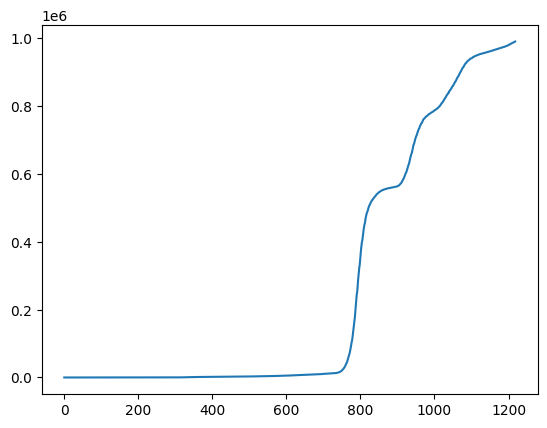

In [368]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [369]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 충남

In [370]:
city = '충남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [371]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

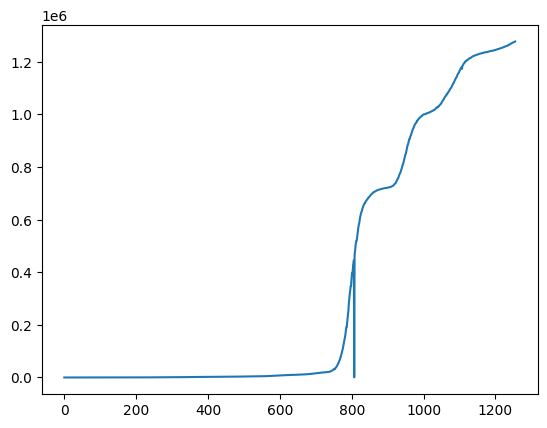

In [372]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [373]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,25,1707,충남,Chungcheongnam-do,23,1207,475,22,1,80.43,2021-01-04
351,25,1707,충남,Chungcheongnam-do,23,1210,472,22,1,80.43,2021-01-04
654,61,10807,충남,Chungcheongnam-do,91,9917,738,91,0,510.00,2021-11-03
655,61,10807,충남,Chungcheongnam-do,91,9962,784,91,0,510.00,2021-11-03
751,205,32736,충남,Chungcheongnam-do,1473,18824,0,1467,6,1545.00,2022-02-07
752,205,32736,충남,Chungcheongnam-do,1473,32736,0,1467,6,1545.00,2022-02-07
753,205,31263,충남,Chungcheongnam-do,1473,32736,0,1467,6,1475.00,2022-02-07
785,330,190871,충남,Chungcheongnam-do,10798,39065,0,10798,0,9007.00,2022-03-11
786,323,190871,충남,Chungcheongnam-do,10798,35669,0,10798,0,9007.00,2022-03-11
797,466,346953,충남,Chungcheongnam-do,15152,165990,0,0,15152,16371.00,2022-03-22


## 완전히 같은 데이터 추출

In [374]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,626,520140,충남,Chungcheongnam-do,5642,0,0,5642,0,24544.0,2022-04-04
814,626,520140,충남,Chungcheongnam-do,5642,0,0,5642,0,24544.0,2022-04-04
862,946,705567,충남,Chungcheongnam-do,989,0,0,989,0,33293.0,2022-05-21
863,946,705567,충남,Chungcheongnam-do,989,0,0,989,0,33293.0,2022-05-21
893,963,720015,충남,Chungcheongnam-do,134,0,0,127,7,33975.0,2022-06-20
894,963,720015,충남,Chungcheongnam-do,134,0,0,127,7,33975.0,2022-06-20
960,1081,905743,충남,Chungcheongnam-do,5241,0,0,5206,35,42739.0,2022-08-25
961,1081,905743,충남,Chungcheongnam-do,5241,0,0,5206,35,42739.0,2022-08-25
981,1149,974079,충남,Chungcheongnam-do,3725,0,0,3699,26,45963.0,2022-09-14
982,1149,974079,충남,Chungcheongnam-do,3725,0,0,3699,26,45963.0,2022-09-14


In [375]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [376]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,25,1707,충남,Chungcheongnam-do,23,1207,475,22,1,80.43,2021-01-04
351,25,1707,충남,Chungcheongnam-do,23,1210,472,22,1,80.43,2021-01-04
654,61,10807,충남,Chungcheongnam-do,91,9917,738,91,0,510.00,2021-11-03
655,61,10807,충남,Chungcheongnam-do,91,9962,784,91,0,510.00,2021-11-03
751,205,32736,충남,Chungcheongnam-do,1473,18824,0,1467,6,1545.00,2022-02-07
752,205,32736,충남,Chungcheongnam-do,1473,32736,0,1467,6,1545.00,2022-02-07
753,205,31263,충남,Chungcheongnam-do,1473,32736,0,1467,6,1475.00,2022-02-07
785,330,190871,충남,Chungcheongnam-do,10798,39065,0,10798,0,9007.00,2022-03-11
786,323,190871,충남,Chungcheongnam-do,10798,35669,0,10798,0,9007.00,2022-03-11
797,466,346953,충남,Chungcheongnam-do,15152,165990,0,0,15152,16371.00,2022-03-22


## 데이터 수정

In [377]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [381]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 10
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1087,1470,1173825,충남,Chungcheongnam-do,2691,0,0,2691,0,55389.0,2022-12-31
1088,1470,1176252,충남,Chungcheongnam-do,2427,0,0,2427,0,55503.0,2023-01-01
1089,1474,1177220,충남,Chungcheongnam-do,968,0,0,968,0,55549.0,2023-01-02
1090,1477,1180532,충남,Chungcheongnam-do,3312,0,0,3312,0,55705.0,2023-01-03
1091,1478,1173825,충남,Chungcheongnam-do,3348,0,0,3347,1,55389.0,2023-01-04
1092,1478,1183880,충남,Chungcheongnam-do,3348,0,0,3347,1,55863.0,2023-01-04
1093,1479,1186626,충남,Chungcheongnam-do,2746,0,0,2744,2,55993.0,2023-01-05
1094,1482,1189228,충남,Chungcheongnam-do,2602,0,0,2600,2,56115.0,2023-01-06
1095,1486,1191560,충남,Chungcheongnam-do,2336,0,0,2328,8,56225.0,2023-01-07
1096,1489,1193657,충남,Chungcheongnam-do,2097,0,0,2090,7,56324.0,2023-01-08


In [382]:
del_index = [350, 654, 752, 753, 786, 798, 802, 807, 836, 1025, 1049, 1091, 1153, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-29


In [383]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [384]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [385]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


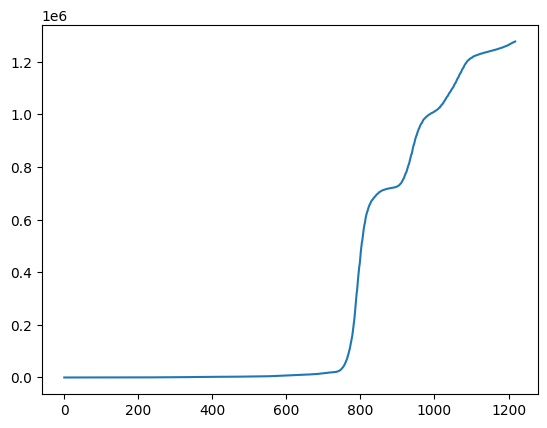

In [386]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [387]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 전북

In [402]:
city = '전북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [403]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

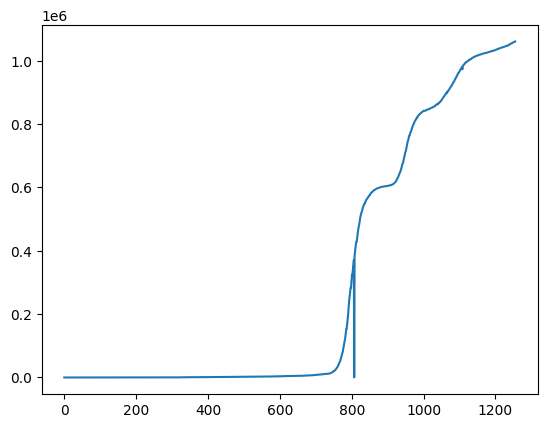

In [404]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [405]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,16,874,전북,Jeollabuk-do,13,664,194,9,4,48.09,2021-01-04
351,16,874,전북,Jeollabuk-do,13,664,194,9,4,48.09,2021-01-04
654,66,5269,전북,Jeollabuk-do,43,4864,296,43,0,292.00,2021-11-03
655,66,5269,전북,Jeollabuk-do,43,4875,328,43,0,292.00,2021-11-03
751,130,20486,전북,Jeollabuk-do,1271,21756,0,1269,2,1146.00,2022-02-07
752,130,21756,전북,Jeollabuk-do,1271,21756,0,1269,2,1218.00,2022-02-07
753,130,21756,전북,Jeollabuk-do,1271,13377,0,1269,2,1218.00,2022-02-07
785,244,153843,전북,Jeollabuk-do,8852,82010,0,8841,11,8610.00,2022-03-11
786,255,153843,전북,Jeollabuk-do,8852,82010,0,8841,11,8610.00,2022-03-11
797,380,283511,전북,Jeollabuk-do,12584,164593,0,12584,0,15866.00,2022-03-22


## 완전히 같은 데이터 추출

In [406]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 46개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,16,874,전북,Jeollabuk-do,13,664,194,9,4,48.09,2021-01-04
351,16,874,전북,Jeollabuk-do,13,664,194,9,4,48.09,2021-01-04
813,595,428485,전북,Jeollabuk-do,5088,0,0,5086,2,23980.00,2022-04-04
814,595,428485,전북,Jeollabuk-do,5088,0,0,5086,2,23980.00,2022-04-04
862,863,591277,전북,Jeollabuk-do,1021,0,0,1021,0,33090.00,2022-05-21
863,863,591277,전북,Jeollabuk-do,1021,0,0,1021,0,33090.00,2022-05-21
893,880,603630,전북,Jeollabuk-do,72,0,0,68,4,33782.00,2022-06-20
894,880,603630,전북,Jeollabuk-do,72,0,0,68,4,33782.00,2022-06-20
960,927,763330,전북,Jeollabuk-do,4533,0,0,4482,51,42719.00,2022-08-25
961,927,763330,전북,Jeollabuk-do,4533,0,0,4482,51,42719.00,2022-08-25


In [407]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [408]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 25개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
653,66,5269,전북,Jeollabuk-do,43,4864,296,43,0,292.0,2021-11-03
654,66,5269,전북,Jeollabuk-do,43,4875,328,43,0,292.0,2021-11-03
750,130,20486,전북,Jeollabuk-do,1271,21756,0,1269,2,1146.0,2022-02-07
751,130,21756,전북,Jeollabuk-do,1271,21756,0,1269,2,1218.0,2022-02-07
752,130,21756,전북,Jeollabuk-do,1271,13377,0,1269,2,1218.0,2022-02-07
784,244,153843,전북,Jeollabuk-do,8852,82010,0,8841,11,8610.0,2022-03-11
785,255,153843,전북,Jeollabuk-do,8852,82010,0,8841,11,8610.0,2022-03-11
796,380,283511,전북,Jeollabuk-do,12584,164593,0,12584,0,15866.0,2022-03-22
797,380,283511,전북,Jeollabuk-do,12584,164593,0,0,12584,15866.0,2022-03-22
800,450,325155,전북,Jeollabuk-do,12824,207927,0,2,12826,18197.0,2022-03-25


## 데이터 수정

In [409]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[653, 750, 784, 796, 800, 806, 834, 1023, 1048, 1090, 1152, 1167]

In [412]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 9
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 11


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1086,1133,972878,전북,Jeollabuk-do,1799,0,0,1798,1,54446.0,2022-12-31
1087,1141,974778,전북,Jeollabuk-do,1900,0,0,1900,0,54553.0,2023-01-01
1088,1143,975469,전북,Jeollabuk-do,691,0,0,691,0,54591.0,2023-01-02
1089,1146,977669,전북,Jeollabuk-do,2200,0,0,2199,1,54715.0,2023-01-03
1090,1147,980261,전북,Jeollabuk-do,2592,0,0,2590,2,54860.0,2023-01-04
1091,1147,972878,전북,Jeollabuk-do,2592,0,0,2590,2,54446.0,2023-01-04
1092,1149,982327,전북,Jeollabuk-do,2066,0,0,2066,0,54975.0,2023-01-05
1093,1150,984204,전북,Jeollabuk-do,1877,0,0,1877,0,55080.0,2023-01-06
1094,1150,985953,전북,Jeollabuk-do,1751,0,0,1748,3,55178.0,2023-01-07
1095,1151,987778,전북,Jeollabuk-do,1825,0,0,1823,2,55280.0,2023-01-08


In [413]:
del_index = [654, 750, 751, 784, 797, 800, 806, 835, 1023, 1048, 1091, 1152, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-29


In [414]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [415]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [416]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


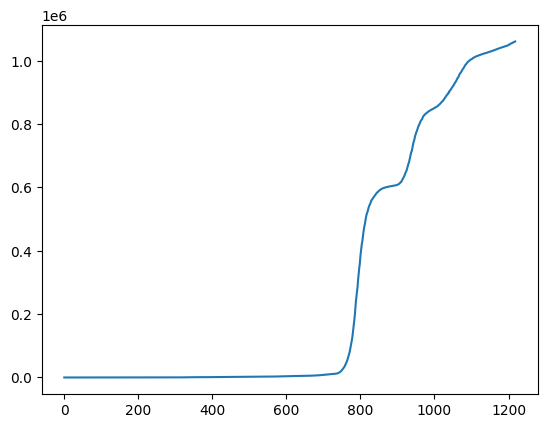

In [417]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [418]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 전남

In [432]:
city = '전남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [433]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

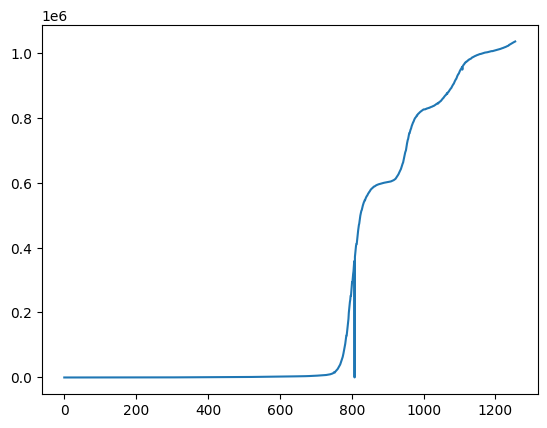

In [434]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [435]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,5,592,전남,Jeollanam-do,3,487,100,3,0,31.75,2021-01-04
351,5,592,전남,Jeollanam-do,3,486,101,3,0,31.75,2021-01-04
654,22,3616,전남,Jeollanam-do,21,3403,170,21,0,195.00,2021-11-03
655,22,3616,전남,Jeollanam-do,21,3416,178,21,0,195.00,2021-11-03
751,47,16300,전남,Jeollanam-do,1133,6921,0,1129,4,889.00,2022-02-07
752,47,16300,전남,Jeollanam-do,1133,16300,0,1129,4,889.00,2022-02-07
753,47,15167,전남,Jeollanam-do,1133,16300,0,1129,4,828.00,2022-02-07
785,76,128930,전남,Jeollanam-do,8987,6956,0,8984,3,7035.00,2022-03-11
786,77,128930,전남,Jeollanam-do,8987,6958,0,8984,3,7035.00,2022-03-11
797,140,251499,전남,Jeollanam-do,12280,6970,0,12279,1,13722.00,2022-03-22


## 완전히 같은 데이터 추출

In [436]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,239,410998,전남,Jeollanam-do,5959,0,0,5959,0,22425.0,2022-04-04
814,239,410998,전남,Jeollanam-do,5959,0,0,5959,0,22425.0,2022-04-04
862,439,587623,전남,Jeollanam-do,907,0,0,907,0,32061.0,2022-05-21
863,439,587623,전남,Jeollanam-do,907,0,0,907,0,32061.0,2022-05-21
893,477,599795,전남,Jeollanam-do,111,0,0,110,1,32726.0,2022-06-20
894,477,599795,전남,Jeollanam-do,111,0,0,110,1,32726.0,2022-06-20
960,577,751438,전남,Jeollanam-do,5081,0,0,5074,7,40999.0,2022-08-25
961,577,751438,전남,Jeollanam-do,5081,0,0,5074,7,40999.0,2022-08-25
981,655,806148,전남,Jeollanam-do,2744,0,0,2739,5,43984.0,2022-09-14
982,655,806148,전남,Jeollanam-do,2744,0,0,2739,5,43984.0,2022-09-14


In [437]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [438]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,5,592,전남,Jeollanam-do,3,487,100,3,0,31.75,2021-01-04
351,5,592,전남,Jeollanam-do,3,486,101,3,0,31.75,2021-01-04
654,22,3616,전남,Jeollanam-do,21,3403,170,21,0,195.00,2021-11-03
655,22,3616,전남,Jeollanam-do,21,3416,178,21,0,195.00,2021-11-03
751,47,16300,전남,Jeollanam-do,1133,6921,0,1129,4,889.00,2022-02-07
752,47,16300,전남,Jeollanam-do,1133,16300,0,1129,4,889.00,2022-02-07
753,47,15167,전남,Jeollanam-do,1133,16300,0,1129,4,828.00,2022-02-07
785,76,128930,전남,Jeollanam-do,8987,6956,0,8984,3,7035.00,2022-03-11
786,77,128930,전남,Jeollanam-do,8987,6958,0,8984,3,7035.00,2022-03-11
797,140,251499,전남,Jeollanam-do,12280,6970,0,12279,1,13722.00,2022-03-22


## 데이터 수정

In [439]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [440]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 10
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1087,870,947524,전남,Jeollanam-do,2117,0,0,2116,1,51698.0,2022-12-31
1088,881,949367,전남,Jeollanam-do,1843,0,0,1843,0,51799.0,2023-01-01
1089,884,950254,전남,Jeollanam-do,887,0,0,887,0,51847.0,2023-01-02
1090,884,953033,전남,Jeollanam-do,2779,0,0,2779,0,51999.0,2023-01-03
1091,885,955532,전남,Jeollanam-do,2499,0,0,2499,0,52135.0,2023-01-04
1092,885,947524,전남,Jeollanam-do,2499,0,0,2499,0,51698.0,2023-01-04
1093,885,957784,전남,Jeollanam-do,2252,0,0,2251,1,52258.0,2023-01-05
1094,890,959749,전남,Jeollanam-do,1965,0,0,1963,2,52365.0,2023-01-06
1095,893,961649,전남,Jeollanam-do,1906,0,0,1902,4,52469.0,2023-01-07
1096,893,963246,전남,Jeollanam-do,1597,0,0,1597,0,52556.0,2023-01-08


In [441]:
del_index = [351, 654, 751, 753, 786, 798, 801, 808, 835, 1024, 1050, 1092, 1153, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-29


In [442]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [443]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [444]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


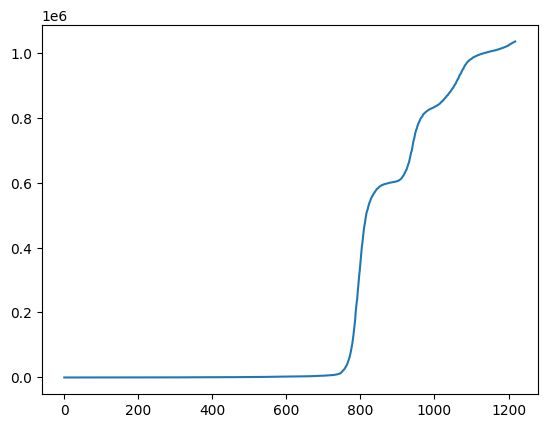

In [445]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [446]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 경북

In [447]:
city = '경북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [448]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

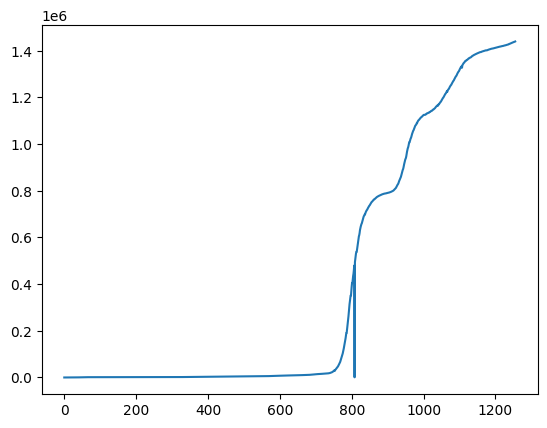

In [449]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [450]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,62,2507,경북,Gyeongsangbuk-do,25,2003,442,25,0,94.16,2021-01-04
351,62,2507,경북,Gyeongsangbuk-do,25,1999,446,25,0,94.16,2021-01-04
654,95,9788,경북,Gyeongsangbuk-do,31,9290,372,31,0,371.00,2021-11-03
655,95,9788,경북,Gyeongsangbuk-do,31,9314,379,31,0,371.00,2021-11-03
751,228,30174,경북,Gyeongsangbuk-do,1686,16455,0,1684,2,1149.00,2022-02-07
752,228,30174,경북,Gyeongsangbuk-do,1686,30174,0,1684,2,1149.00,2022-02-07
753,228,28488,경북,Gyeongsangbuk-do,1686,30174,0,1684,2,1085.00,2022-02-07
785,432,190593,경북,Gyeongsangbuk-do,10315,65808,0,10306,9,7256.00,2022-03-11
786,418,190593,경북,Gyeongsangbuk-do,10315,62715,0,10306,9,7256.00,2022-03-11
797,562,351205,경북,Gyeongsangbuk-do,14429,148289,0,3,14432,13371.00,2022-03-22


## 완전히 같은 데이터 추출

In [451]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,831,538220,경북,Gyeongsangbuk-do,6270,0,0,6266,4,20491.0,2022-04-04
814,831,538220,경북,Gyeongsangbuk-do,6270,0,0,6266,4,20491.0,2022-04-04
862,1341,762885,경북,Gyeongsangbuk-do,1663,0,0,1661,2,29044.0,2022-05-21
863,1341,762885,경북,Gyeongsangbuk-do,1663,0,0,1661,2,29044.0,2022-05-21
893,1390,788144,경북,Gyeongsangbuk-do,228,0,0,222,6,30006.0,2022-06-20
894,1390,788144,경북,Gyeongsangbuk-do,228,0,0,222,6,30006.0,2022-06-20
960,1527,1007099,경북,Gyeongsangbuk-do,6422,0,0,6400,22,38342.0,2022-08-25
961,1527,1007099,경북,Gyeongsangbuk-do,6422,0,0,6400,22,38342.0,2022-08-25
981,1605,1089380,경북,Gyeongsangbuk-do,4329,0,0,4306,23,41475.0,2022-09-14
982,1605,1089380,경북,Gyeongsangbuk-do,4329,0,0,4306,23,41475.0,2022-09-14


In [452]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [453]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,62,2507,경북,Gyeongsangbuk-do,25,2003,442,25,0,94.16,2021-01-04
351,62,2507,경북,Gyeongsangbuk-do,25,1999,446,25,0,94.16,2021-01-04
654,95,9788,경북,Gyeongsangbuk-do,31,9290,372,31,0,371.00,2021-11-03
655,95,9788,경북,Gyeongsangbuk-do,31,9314,379,31,0,371.00,2021-11-03
751,228,30174,경북,Gyeongsangbuk-do,1686,16455,0,1684,2,1149.00,2022-02-07
752,228,30174,경북,Gyeongsangbuk-do,1686,30174,0,1684,2,1149.00,2022-02-07
753,228,28488,경북,Gyeongsangbuk-do,1686,30174,0,1684,2,1085.00,2022-02-07
785,432,190593,경북,Gyeongsangbuk-do,10315,65808,0,10306,9,7256.00,2022-03-11
786,418,190593,경북,Gyeongsangbuk-do,10315,62715,0,10306,9,7256.00,2022-03-11
797,562,351205,경북,Gyeongsangbuk-do,14429,148289,0,3,14432,13371.00,2022-03-22


## 데이터 수정

In [454]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [456]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 10
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1087,1952,1326714,경북,Gyeongsangbuk-do,3006,0,0,3003,3,50511.0,2022-12-31
1088,1953,1329501,경북,Gyeongsangbuk-do,2787,0,0,2787,0,50617.0,2023-01-01
1089,1954,1330717,경북,Gyeongsangbuk-do,1216,0,0,1215,1,50663.0,2023-01-02
1090,1957,1333533,경북,Gyeongsangbuk-do,2816,0,0,2815,1,50770.0,2023-01-03
1091,1960,1326714,경북,Gyeongsangbuk-do,3716,0,0,3712,4,50511.0,2023-01-04
1092,1960,1337249,경북,Gyeongsangbuk-do,3716,0,0,3712,4,50912.0,2023-01-04
1093,1960,1340179,경북,Gyeongsangbuk-do,2930,0,0,2924,6,51023.0,2023-01-05
1094,1965,1342798,경북,Gyeongsangbuk-do,2619,0,0,2616,3,51123.0,2023-01-06
1095,1972,1345196,경북,Gyeongsangbuk-do,2401,0,0,2391,10,51214.0,2023-01-07
1096,1974,1347481,경북,Gyeongsangbuk-do,2285,0,0,2274,11,51301.0,2023-01-08


In [457]:
del_index = [350, 655, 751, 752, 785, 798, 802, 808, 836, 1024, 1050, 1091, 1154, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-29


In [458]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [459]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [460]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


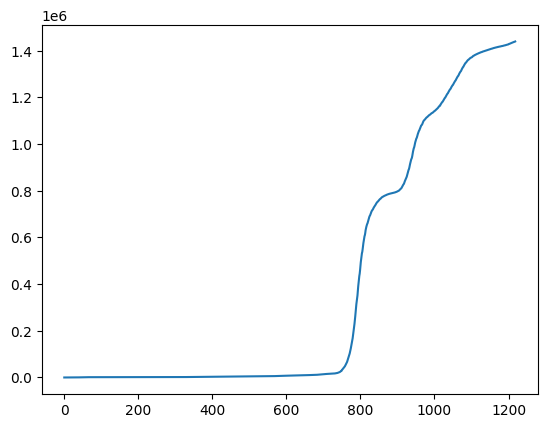

In [461]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [462]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 경남

In [463]:
city = '경남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [464]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

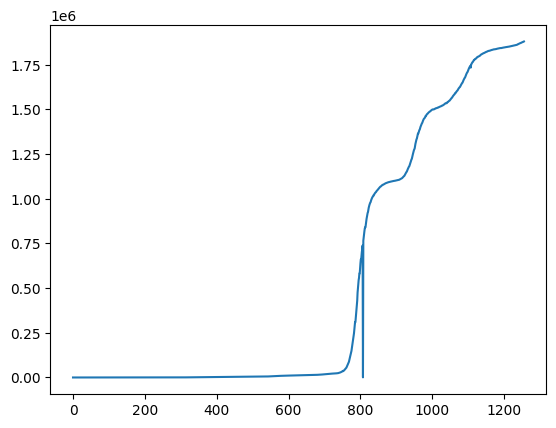

In [465]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [466]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,5,1442,경남,Gyeongsangnam-do,33,1089,348,33,0,42.9,2021-01-04
351,5,1442,경남,Gyeongsangnam-do,33,1089,348,33,0,42.9,2021-01-04
654,42,13220,경남,Gyeongsangnam-do,108,12539,639,108,0,396.0,2021-11-03
655,41,13220,경남,Gyeongsangnam-do,108,12508,563,108,0,396.0,2021-11-03
751,121,36949,경남,Gyeongsangnam-do,1672,25659,0,1664,8,1115.0,2022-02-07
752,121,35277,경남,Gyeongsangnam-do,1672,36949,0,1664,8,1064.0,2022-02-07
753,121,36949,경남,Gyeongsangnam-do,1672,36949,0,1664,8,1115.0,2022-02-07
785,233,309731,경남,Gyeongsangnam-do,21428,135970,0,21422,6,9346.0,2022-03-11
786,243,309731,경남,Gyeongsangnam-do,21428,135967,0,21422,6,9346.0,2022-03-11
797,477,581709,경남,Gyeongsangnam-do,24707,296516,0,24703,4,17552.0,2022-03-22


## 완전히 같은 데이터 추출

In [467]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 46개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,5,1442,경남,Gyeongsangnam-do,33,1089,348,33,0,42.9,2021-01-04
351,5,1442,경남,Gyeongsangnam-do,33,1089,348,33,0,42.9,2021-01-04
813,830,840006,경남,Gyeongsangnam-do,7385,0,0,7383,2,25346.0,2022-04-04
814,830,840006,경남,Gyeongsangnam-do,7385,0,0,7383,2,25346.0,2022-04-04
862,1215,1077670,경남,Gyeongsangnam-do,1515,0,0,1513,2,32517.0,2022-05-21
863,1215,1077670,경남,Gyeongsangnam-do,1515,0,0,1513,2,32517.0,2022-05-21
893,1256,1099030,경남,Gyeongsangnam-do,194,0,0,184,10,33161.0,2022-06-20
894,1256,1099030,경남,Gyeongsangnam-do,194,0,0,184,10,33161.0,2022-06-20
960,1369,1363835,경남,Gyeongsangnam-do,7982,0,0,7950,32,41151.0,2022-08-25
961,1369,1363835,경남,Gyeongsangnam-do,7982,0,0,7950,32,41151.0,2022-08-25


In [468]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [469]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 25개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
653,42,13220,경남,Gyeongsangnam-do,108,12539,639,108,0,396.0,2021-11-03
654,41,13220,경남,Gyeongsangnam-do,108,12508,563,108,0,396.0,2021-11-03
750,121,36949,경남,Gyeongsangnam-do,1672,25659,0,1664,8,1115.0,2022-02-07
751,121,35277,경남,Gyeongsangnam-do,1672,36949,0,1664,8,1064.0,2022-02-07
752,121,36949,경남,Gyeongsangnam-do,1672,36949,0,1664,8,1115.0,2022-02-07
784,233,309731,경남,Gyeongsangnam-do,21428,135970,0,21422,6,9346.0,2022-03-11
785,243,309731,경남,Gyeongsangnam-do,21428,135967,0,21422,6,9346.0,2022-03-11
796,477,581709,경남,Gyeongsangnam-do,24707,296516,0,24703,4,17552.0,2022-03-22
797,477,581709,경남,Gyeongsangnam-do,24703,296516,0,4,24707,17552.0,2022-03-22
800,579,660619,경남,Gyeongsangnam-do,21664,460063,0,2,21666,19933.0,2022-03-25


## 데이터 수정

In [470]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[653, 750, 784, 796, 800, 806, 834, 1023, 1048, 1090, 1152, 1167]

In [473]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 9
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 11


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1086,1749,1733021,경남,Gyeongsangnam-do,4344,0,0,4342,2,52291.0,2022-12-31
1087,1754,1736948,경남,Gyeongsangnam-do,3927,0,0,3926,1,52410.0,2023-01-01
1088,1755,1738496,경남,Gyeongsangnam-do,1548,0,0,1548,0,52456.0,2023-01-02
1089,1758,1743649,경남,Gyeongsangnam-do,5153,0,0,5153,0,52612.0,2023-01-03
1090,1763,1733021,경남,Gyeongsangnam-do,5370,0,0,5369,1,52291.0,2023-01-04
1091,1763,1749019,경남,Gyeongsangnam-do,5370,0,0,5369,1,52774.0,2023-01-04
1092,1776,1753425,경남,Gyeongsangnam-do,4406,0,0,4401,5,52907.0,2023-01-05
1093,1780,1757104,경남,Gyeongsangnam-do,3679,0,0,3673,6,53018.0,2023-01-06
1094,1782,1760649,경남,Gyeongsangnam-do,3547,0,0,3545,2,53125.0,2023-01-07
1095,1785,1763708,경남,Gyeongsangnam-do,3059,0,0,3059,0,53217.0,2023-01-08


In [474]:
del_index = [654, 751, 752, 785, 796, 801, 806, 834, 1023, 1048, 1090, 1152, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-24
5,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-25
6,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-26
7,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-27
8,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-28
9,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-29


In [475]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [476]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [477]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


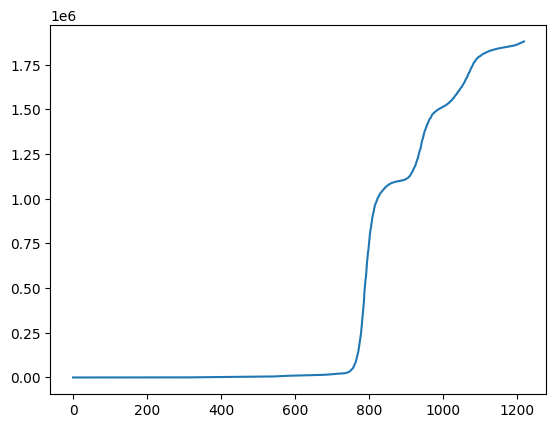

In [478]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [479]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)

# 제주

In [480]:
city = '제주'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-20
1,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-21
2,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-22
3,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-23
4,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [481]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

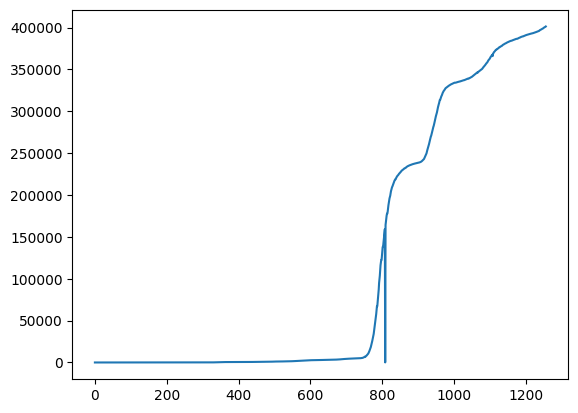

In [482]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [483]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,0,448,제주,Jeju,10,287,161,9,1,66.79,2021-01-04
351,0,448,제주,Jeju,10,285,163,9,1,66.79,2021-01-04
654,2,3121,제주,Jeju,17,3047,55,17,0,463.00,2021-11-03
655,2,3121,제주,Jeju,17,3053,66,17,0,463.00,2021-11-03
751,13,6913,제주,Jeju,369,6913,0,368,1,1021.00,2022-02-07
752,13,6544,제주,Jeju,369,6913,0,368,1,967.00,2022-02-07
753,13,6913,제주,Jeju,369,5288,0,368,1,1021.00,2022-02-07
785,33,67199,제주,Jeju,4289,39852,0,4289,0,9930.00,2022-03-11
786,30,67199,제주,Jeju,4289,36235,0,4289,0,9930.00,2022-03-11
797,67,122662,제주,Jeju,3191,94088,0,3191,0,18125.00,2022-03-22


## 완전히 같은 데이터 추출

In [484]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,114,177775,제주,Jeju,2261,0,0,2261,0,26269.0,2022-04-04
814,114,177775,제주,Jeju,2261,0,0,2261,0,26269.0,2022-04-04
862,174,232053,제주,Jeju,380,0,0,380,0,34289.0,2022-05-21
863,174,232053,제주,Jeju,380,0,0,380,0,34289.0,2022-05-21
893,182,237894,제주,Jeju,77,0,0,72,5,35152.0,2022-06-20
894,182,237894,제주,Jeju,77,0,0,72,5,35152.0,2022-06-20
960,207,313644,제주,Jeju,1634,0,0,1622,12,46345.0,2022-08-25
961,207,313644,제주,Jeju,1634,0,0,1622,12,46345.0,2022-08-25
981,216,329390,제주,Jeju,470,0,0,466,4,48672.0,2022-09-14
982,216,329390,제주,Jeju,470,0,0,466,4,48672.0,2022-09-14


In [485]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [486]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,0,448,제주,Jeju,10,287,161,9,1,66.79,2021-01-04
351,0,448,제주,Jeju,10,285,163,9,1,66.79,2021-01-04
654,2,3121,제주,Jeju,17,3047,55,17,0,463.00,2021-11-03
655,2,3121,제주,Jeju,17,3053,66,17,0,463.00,2021-11-03
751,13,6913,제주,Jeju,369,6913,0,368,1,1021.00,2022-02-07
752,13,6544,제주,Jeju,369,6913,0,368,1,967.00,2022-02-07
753,13,6913,제주,Jeju,369,5288,0,368,1,1021.00,2022-02-07
785,33,67199,제주,Jeju,4289,39852,0,4289,0,9930.00,2022-03-11
786,30,67199,제주,Jeju,4289,36235,0,4289,0,9930.00,2022-03-11
797,67,122662,제주,Jeju,3191,94088,0,3191,0,18125.00,2022-03-22


## 데이터 수정

In [487]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [491]:
print('n : 0 ~ ' + str(len(repair_index)-1))
n = 10
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1087,240,365960,제주,Jeju,691,0,0,691,0,54075.0,2022-12-31
1088,241,366548,제주,Jeju,588,0,0,588,0,54162.0,2023-01-01
1089,241,367029,제주,Jeju,481,0,0,481,0,54233.0,2023-01-02
1090,241,367632,제주,Jeju,603,0,0,602,1,54322.0,2023-01-03
1091,244,365960,제주,Jeju,1033,0,0,1033,0,54075.0,2023-01-04
1092,244,368665,제주,Jeju,1033,0,0,1033,0,54475.0,2023-01-04
1093,245,369479,제주,Jeju,814,0,0,811,3,54595.0,2023-01-05
1094,247,370119,제주,Jeju,640,0,0,638,2,54690.0,2023-01-06
1095,248,370849,제주,Jeju,730,0,0,727,3,54798.0,2023-01-07
1096,248,371378,제주,Jeju,529,0,0,528,1,54876.0,2023-01-08


In [492]:
del_index = [350, 655, 751, 753, 785, 798, 802, 808, 835, 1025, 1050, 1091, 1154, 1169]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-20
1,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-21
2,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-22
3,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-23
4,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-24
5,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-25
6,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-26
7,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-27
8,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-28
9,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-29


In [493]:
df_final['incDec'] = df_final['defCnt'].diff()
df_final = df_final.fillna(0)

## 최종 확인

### stdDay가 같은 데이터

In [494]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


### 누적 확진자 수가 감소하는지 check

In [495]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


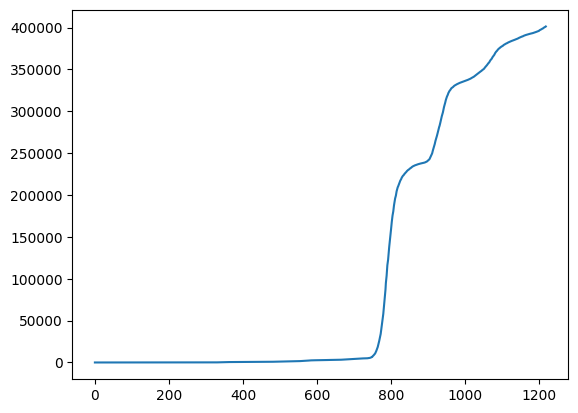

In [496]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [497]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Cleaned_defCnt/{city}_Cleaned.csv', index = False)